https://www.kaggle.com/code/ocanaydin/network-slicing-dl#DEEP-NEURAL-NETWORK


In [2]:
#Importing Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from setuptools import distutils
import visualkeras
from PIL import ImageFont
from collections import defaultdict
#from keras.utils import np_utils
#from tensorflow.keras.utils import to_categorical
#from tensorflow.python.keras.utils import np_utils


In [3]:
#DATA PREPARATION

# Load the training dataset and testing dataset
train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")

# Display the first few rows of the dataset
train_dataset.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


In [4]:
#Finding the shape of train and test data

print(f"Train dataset shape : {train_dataset.shape}\nTest dataset shape : {test_dataset.shape}")
#train_dataset.head(5)

Train dataset shape : (31583, 17)
Test dataset shape : (31584, 16)


In [5]:
#Check if any nan data/missing data is included in columns.
print(train_dataset.isna().sum())
print(test_dataset.isna().sum())

LTE/5g Category         0
Time                    0
Packet Loss Rate        0
Packet delay            0
IoT                     0
LTE/5G                  0
GBR                     0
Non-GBR                 0
AR/VR/Gaming            0
Healthcare              0
Industry 4.0            0
IoT Devices             0
Public Safety           0
Smart City & Home       0
Smart Transportation    0
Smartphone              0
slice Type              0
dtype: int64
LTE/5g Category         0
Time                    0
Packet Loss Rate        0
Packet delay            0
IoT                     0
LTE/5G                  0
GBR                     0
Non-GBR                 0
AR/VR/Gaming            0
Healthcare              0
Industry 4.0            0
IoT Devices             0
Public Safety           0
Smart City & Home       0
Smart Transportation    0
Smartphone              0
dtype: int64


([<matplotlib.axis.YTick at 0x14b92129030>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.01, '0.01'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.03, '0.03'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.05, '0.05')])

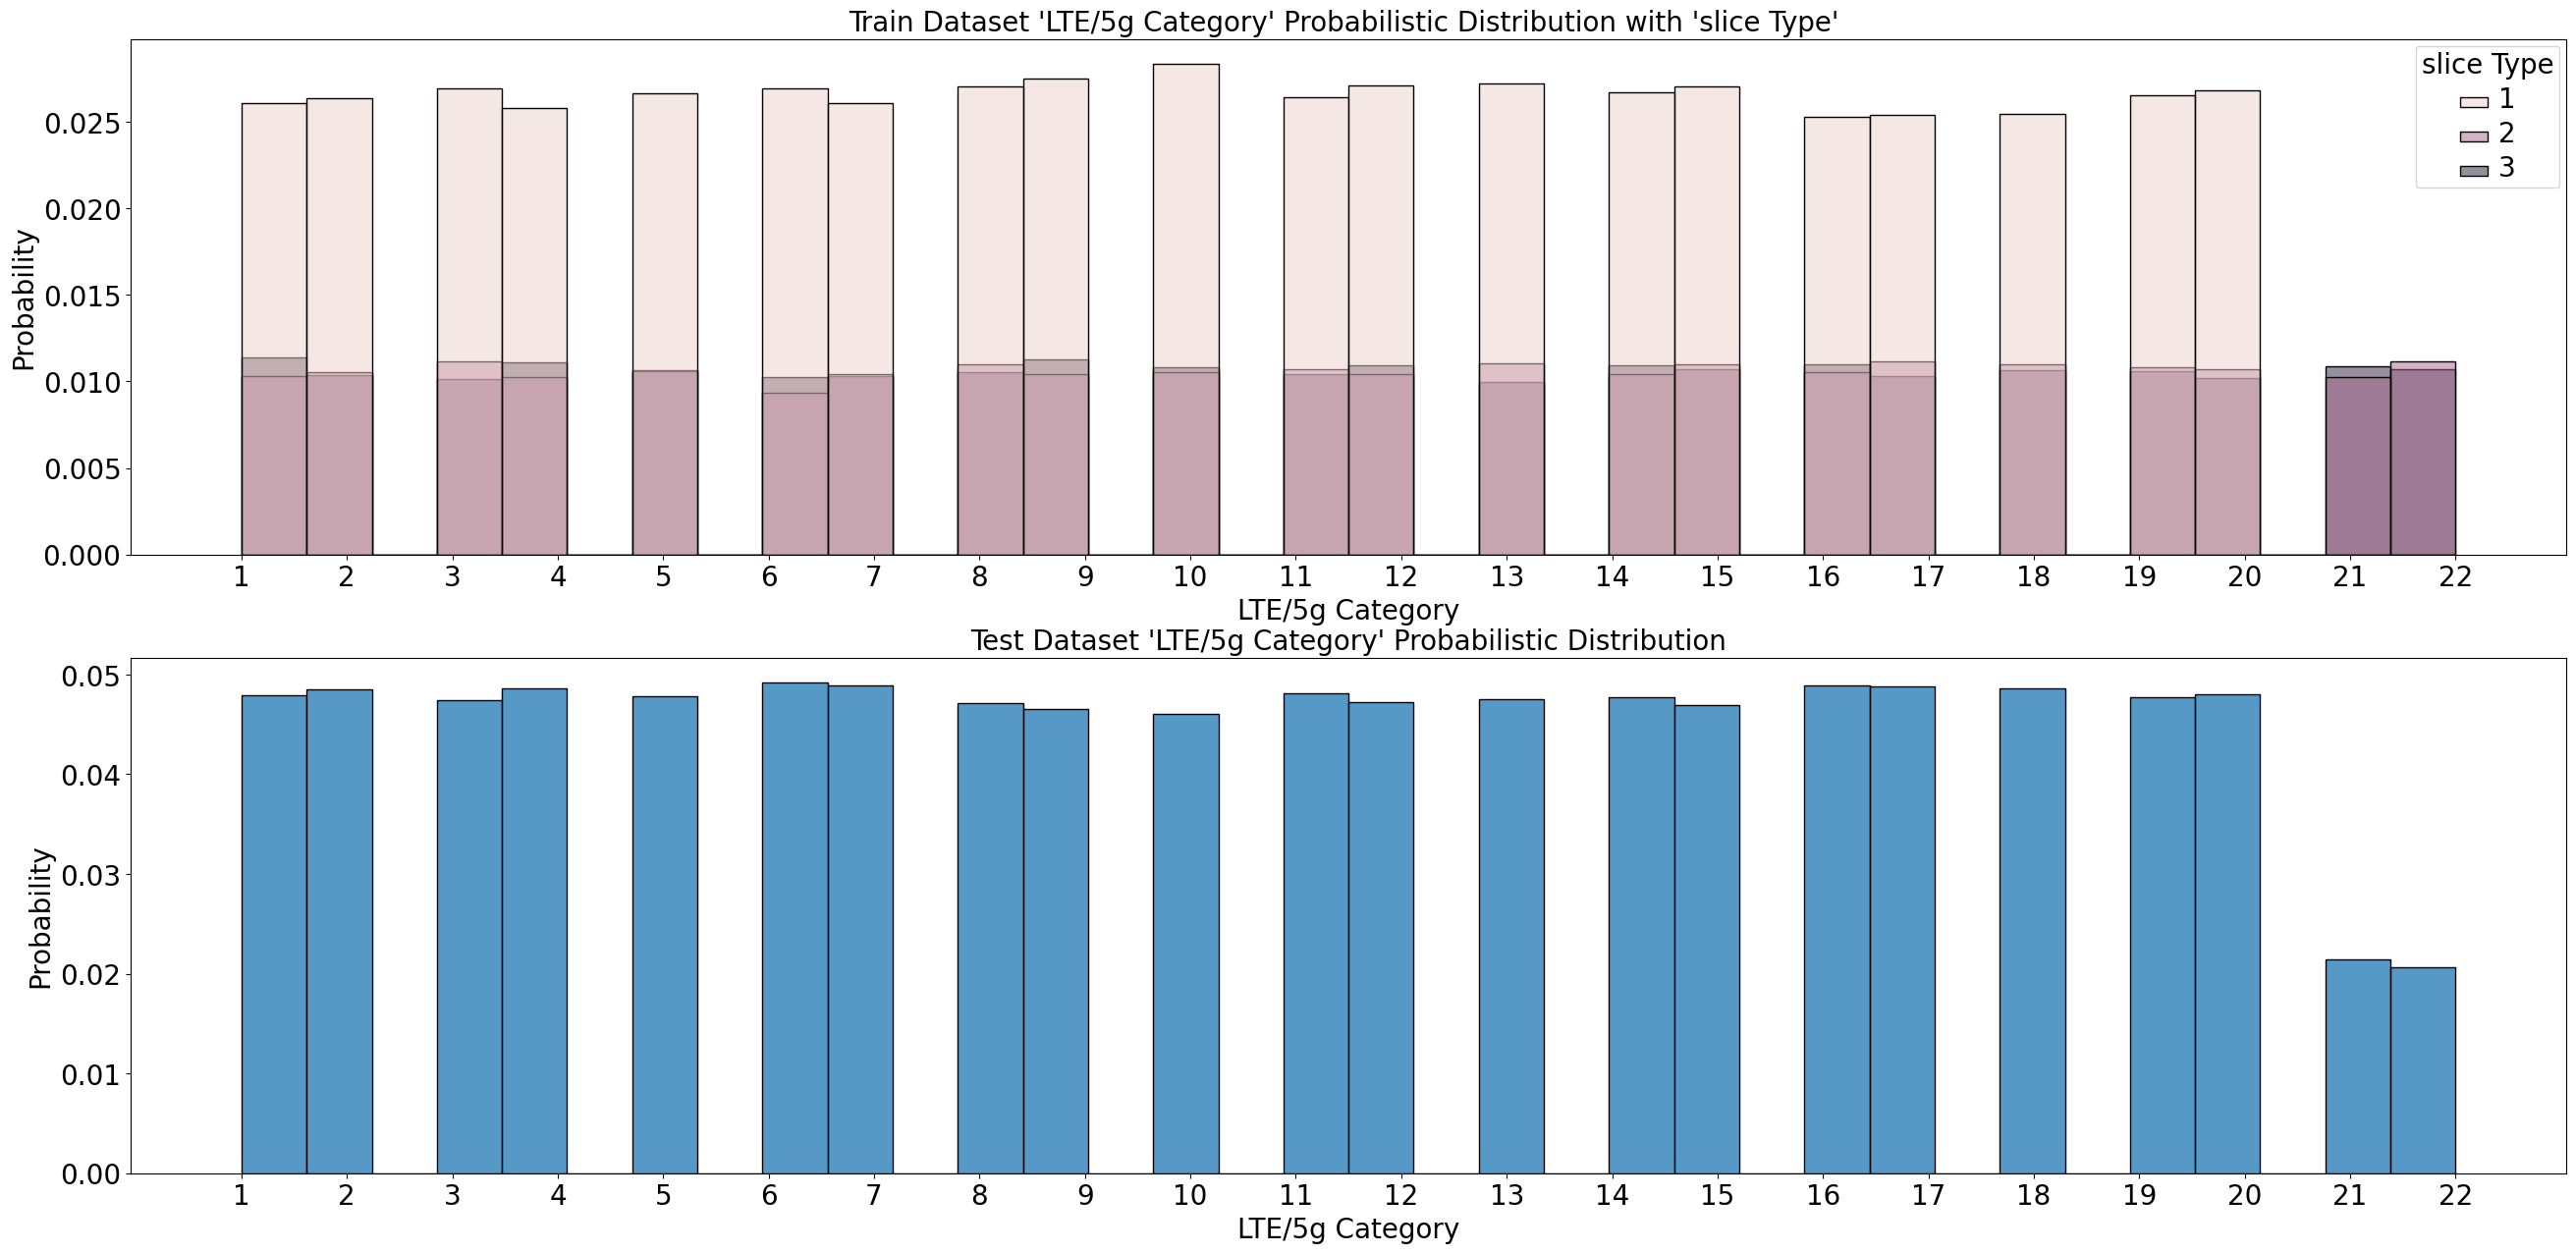

In [6]:
#'LTE/5g Category' probabilistic distributions.
fig = plt.figure(figsize = (32,15))

#For train dataset
plt.subplot(2,1,1)
plt.title("Train Dataset 'LTE/5g Category' Probabilistic Distribution with 'slice Type' ",fontsize =20)
train_lte_hist = sns.histplot(data = train_dataset,x = "LTE/5g Category",stat = "probability", hue = "slice Type")

plt.xticks(train_dataset["LTE/5g Category"].value_counts().index,fontsize = 20)
plt.xlabel("LTE/5g Category",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.yticks(np.arange(0.000,0.030,0.005),fontsize = 20);

plt.setp(train_lte_hist.get_legend().get_texts(),fontsize = '20')
plt.setp(train_lte_hist.get_legend().get_title(),fontsize = '20');


#For test dataset
plt.subplot(2,1,2)
plt.title("Test Dataset 'LTE/5g Category' Probabilistic Distribution",fontsize =20)
sns.histplot(data = test_dataset,x = "LTE/5g Category",stat = "probability")

plt.xticks(test_dataset["LTE/5g Category"].value_counts().index,fontsize = 20)
plt.xlabel("LTE/5g Category",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.yticks(np.arange(0.00,0.06,0.01),fontsize = 20)

<Axes: title={'center': "Train dataset 'Time' feature with 'slice Type' "}, xlabel='Time', ylabel='slice Type'>

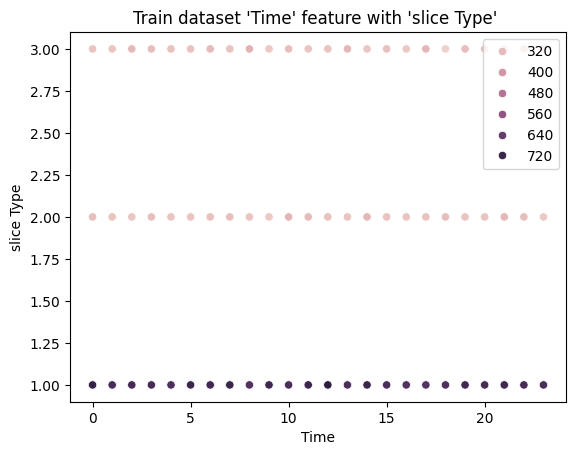

In [7]:
#Time feature with slice type.

plt.title("Train dataset 'Time' feature with 'slice Type' ")

time_slice_type = pd.concat([train_dataset["Time"],train_dataset["slice Type"]],axis = 1)
time = time_slice_type.value_counts().index.get_level_values(0)
slice_type = time_slice_type.value_counts().index.get_level_values(1)

sns.scatterplot(x = time,y = slice_type,hue = time_slice_type.value_counts().values)

count    31583.000000
mean        11.476459
std          6.915643
min          0.000000
25%          6.000000
50%         11.000000
75%         17.000000
max         23.000000
Name: Time, dtype: float64


Text(0, 0.5, 'Time')

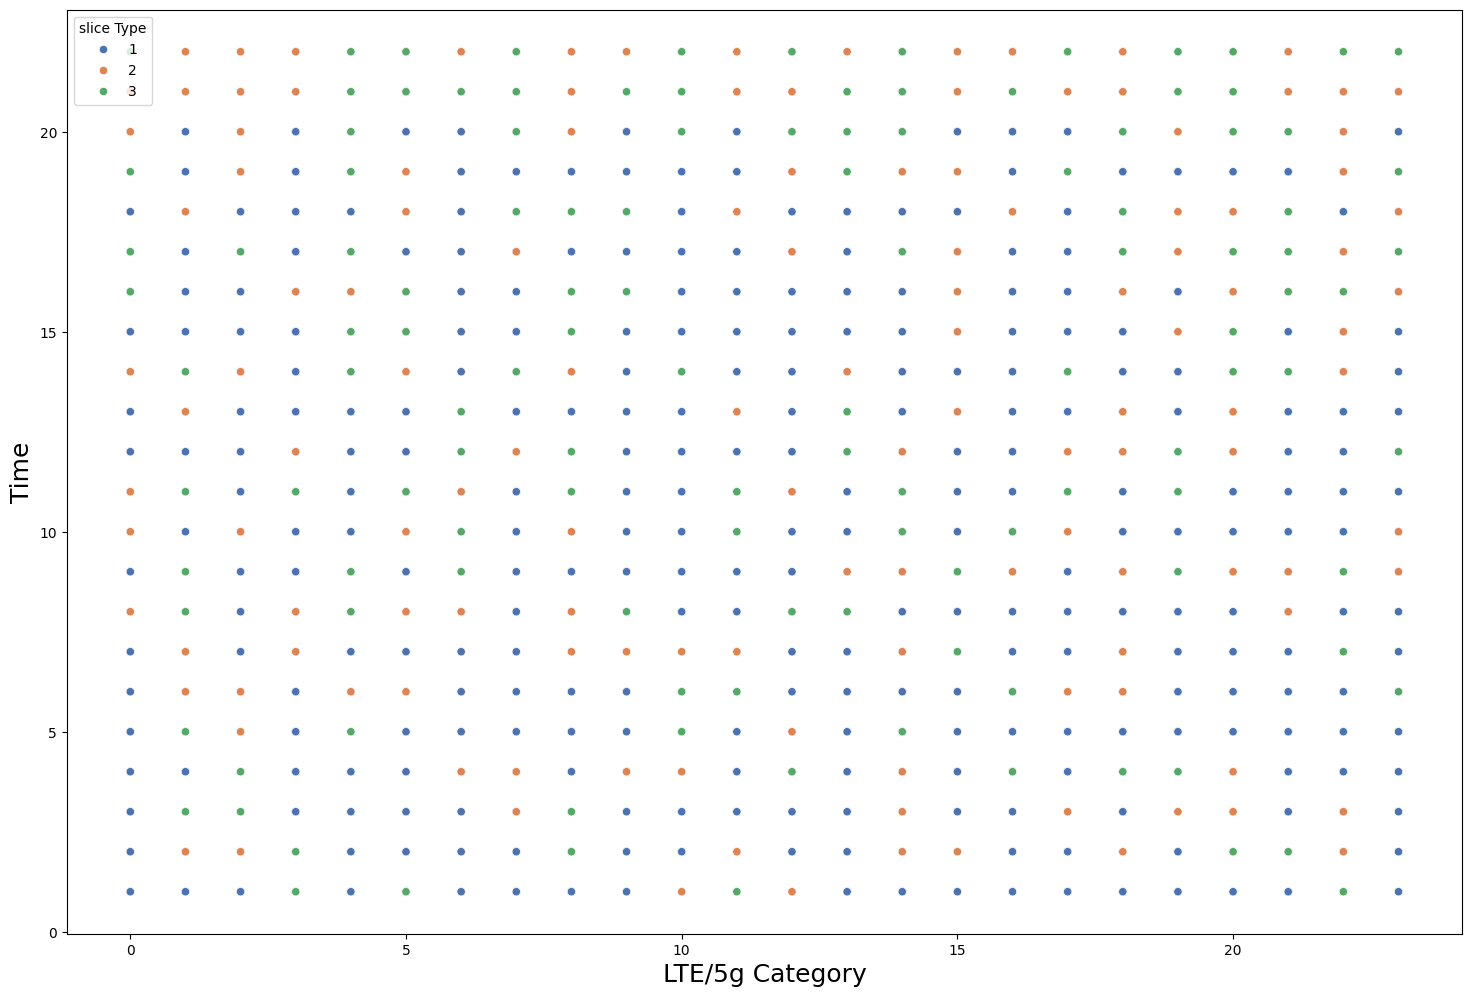

In [8]:
print(train_dataset["Time"].describe())

plt.figure(figsize = (18,12))
sns.scatterplot(data = train_dataset,x = "Time", y= "LTE/5g Category",hue = "slice Type", palette = "deep")

plt.xlabel("LTE/5g Category",fontsize = 18)
plt.ylabel("Time",fontsize = 18)

Text(0, 0.5, 'Probability')

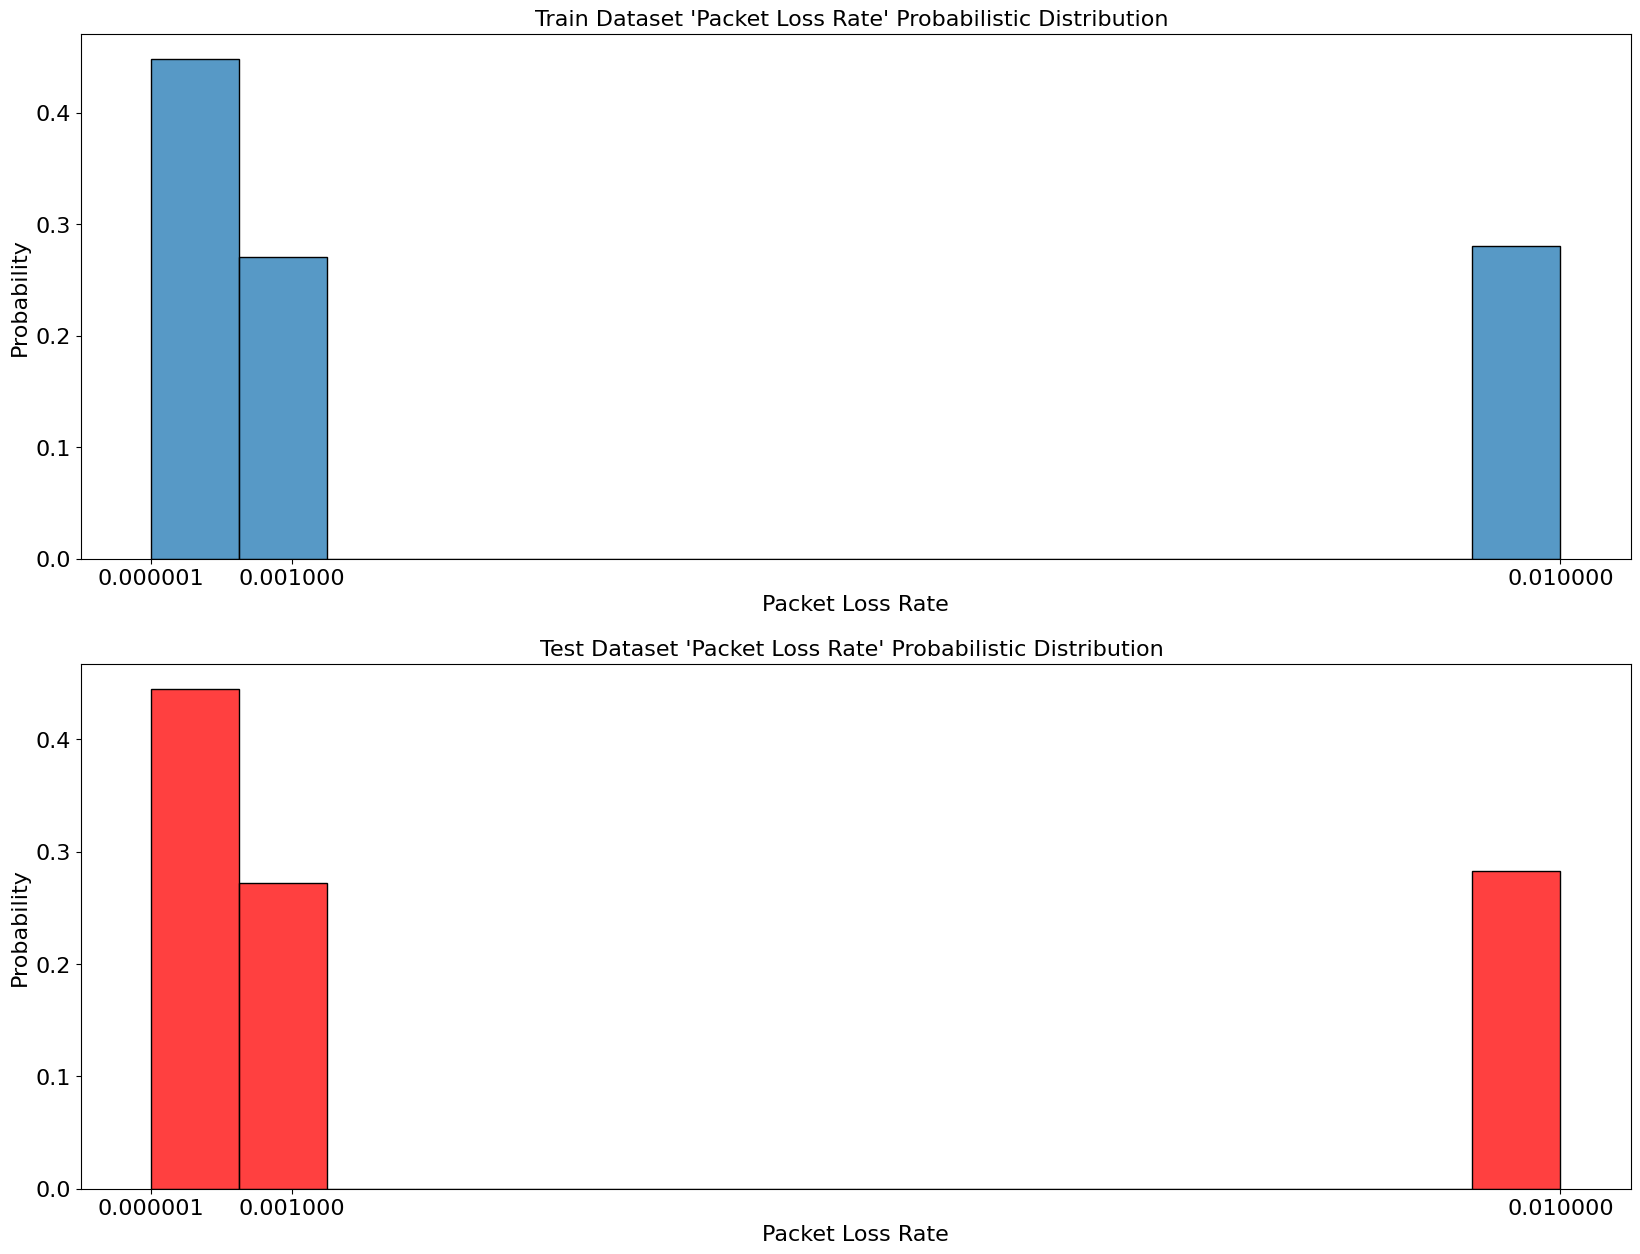

In [9]:
#Packet loss rate
fig = plt.figure(figsize = (20,15))

#For train dataset
plt.subplot(2,1,1)
plt.title("Train Dataset 'Packet Loss Rate' Probabilistic Distribution ",fontsize =16)
train_lte_hist = sns.histplot(data = train_dataset,x = "Packet Loss Rate",stat = "probability")

plt.xticks(train_dataset["Packet Loss Rate"].value_counts().index,fontsize = 16)
plt.yticks(np.arange(0,0.5,0.1),fontsize = 16)
plt.xlabel("Packet Loss Rate",fontsize = 16)
plt.ylabel("Probability",fontsize = 16)

#For test dataset
plt.subplot(2,1,2)
plt.title("Test Dataset 'Packet Loss Rate' Probabilistic Distribution ",fontsize =16)
train_lte_hist = sns.histplot(data = test_dataset,x = "Packet Loss Rate",stat = "probability", color = "red")

plt.xticks(test_dataset["Packet Loss Rate"].value_counts().index,fontsize = 16)
plt.yticks(np.arange(0,0.5,0.1),fontsize = 16)
plt.xlabel("Packet Loss Rate",fontsize = 16)
plt.ylabel("Probability",fontsize = 16)

Text(0, 0.5, 'Count')

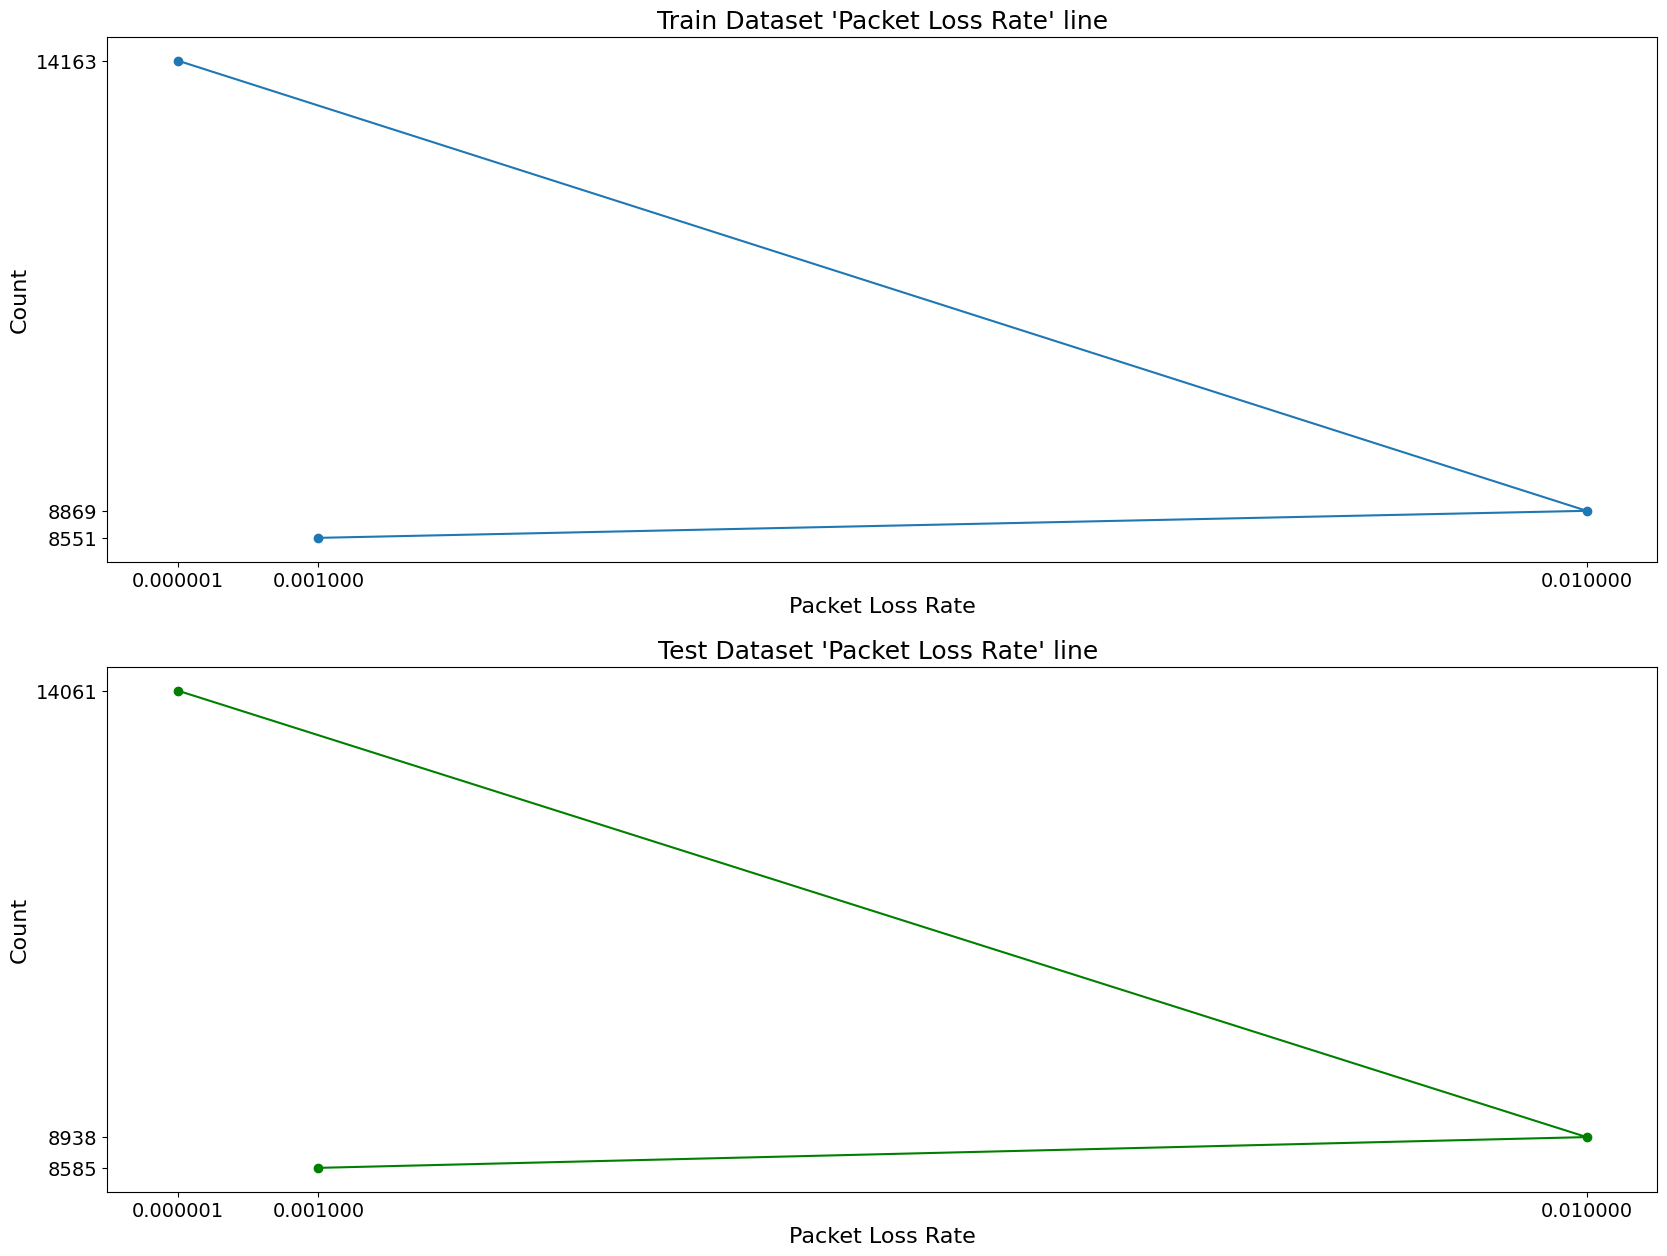

In [10]:
plt.figure(figsize = (20,15))
#For train dataset
plt.subplot(2,1,1)

plt.title("Train Dataset 'Packet Loss Rate' line",fontsize = 18)
plt.plot(train_dataset["Packet Loss Rate"].value_counts(),marker = "o")
plt.xticks(train_dataset["Packet Loss Rate"].unique(),fontsize = 14)
plt.yticks(train_dataset["Packet Loss Rate"].value_counts(),fontsize = 14)

plt.xlabel("Packet Loss Rate",fontsize = 16)
plt.ylabel("Count",fontsize = 16)
#For test dataset
plt.subplot(2,1,2)

plt.title("Test Dataset 'Packet Loss Rate' line ",fontsize = 18)
plt.plot(test_dataset["Packet Loss Rate"].value_counts(),marker = "o",color = "green")
plt.xticks(test_dataset["Packet Loss Rate"].unique(),fontsize = 14)
plt.yticks(test_dataset["Packet Loss Rate"].value_counts(),fontsize = 14)

plt.xlabel("Packet Loss Rate",fontsize = 16)
plt.ylabel("Count",fontsize = 16)

C:\Users\saumy\AppData\Local\Temp\ipykernel_5560\3609527349.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = train_dataset,x = "Packet delay",palette = "deep",stat = "probability", kde = True)


<Axes: title={'center': "Test Dataset 'Packet delay' probability distributions"}, xlabel='Packet delay', ylabel='Probability'>

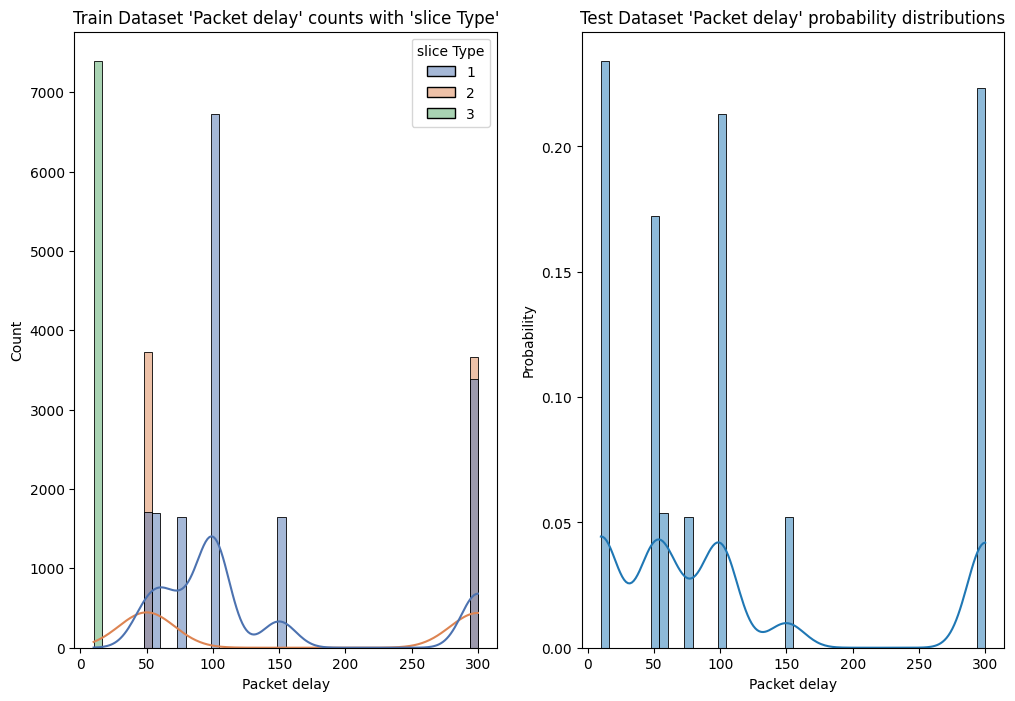

In [11]:
plt.figure(figsize = (12,8))

#For train dataset
plt.subplot(1,2,1)
plt.title("Train Dataset 'Packet delay' counts with 'slice Type'")
sns.histplot(data = train_dataset,x = "Packet delay",hue = "slice Type",palette = "deep", kde = True)

#For test dataset
plt.subplot(1,2,2)
plt.title("Test Dataset 'Packet delay' probability distributions")
sns.histplot(data = train_dataset,x = "Packet delay",palette = "deep",stat = "probability", kde = True)

In [12]:
train_dataset.head(3)

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1


C:\Users\saumy\AppData\Local\Temp\ipykernel_5560\2847403260.py:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data = train_dataset,x = "slice Type",hue = "IoT Devices", palette = sns.color_palette("bright",3),stat = "probability",alpha = 0.5)


<Axes: title={'center': "Train Dataset 'LTE/5G' probability with slice Type"}, xlabel='slice Type', ylabel='Probability'>

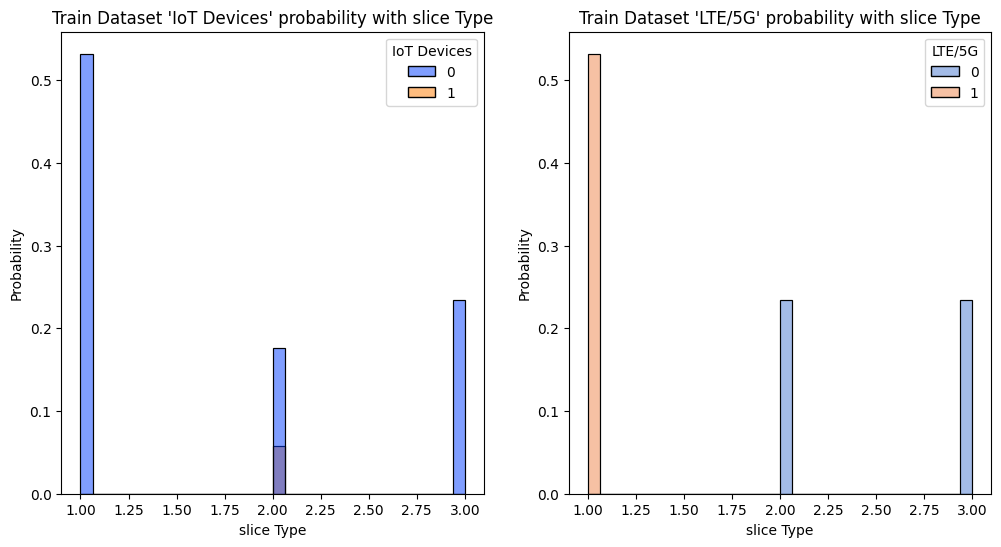

In [13]:
plt.figure(figsize = (12,6))

#For IoT
plt.subplot(1,2,1)
plt.title("Train Dataset 'IoT Devices' probability with slice Type")
sns.histplot(data = train_dataset,x = "slice Type",hue = "IoT Devices", palette = sns.color_palette("bright",3),stat = "probability",alpha = 0.5)

#For LTE/5G
plt.subplot(1,2,2)
plt.title("Train Dataset 'LTE/5G' probability with slice Type")
sns.histplot(data = train_dataset,x = "slice Type",hue = "LTE/5G",palette = "muted",stat = "probability", alpha = 0.5)

   GBR  slice Type  count
0    1           1   8422
1    0           1   8377
2    0           3   7392
3    1           2   5512
4    0           2   1880


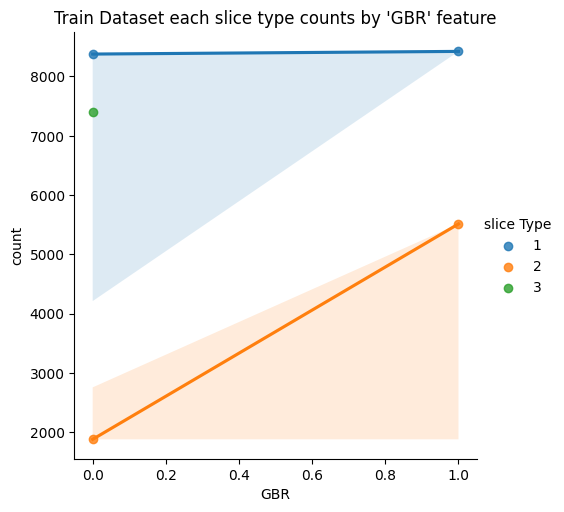

In [14]:
#Find the counts of each slice for GBR.
GBR_slice_type = pd.concat([train_dataset["GBR"],train_dataset["slice Type"]],axis = 1)
GBR = pd.DataFrame(GBR_slice_type.value_counts().index.get_level_values(0).values,columns = ["GBR"])
slice_type = pd.DataFrame(GBR_slice_type.value_counts().index.get_level_values(1).values, columns = ["slice Type"])

counts = pd.DataFrame(GBR_slice_type.value_counts().values,columns = ["count"])
GBR_slice_type = pd.concat([GBR,slice_type,counts],axis = 1)

#Plot GBR with slice Type total counts.
print(GBR_slice_type)

sns.lmplot(data = GBR_slice_type, x = "GBR", y = "count",hue = "slice Type").set(title = "Train Dataset each slice type counts by 'GBR' feature")

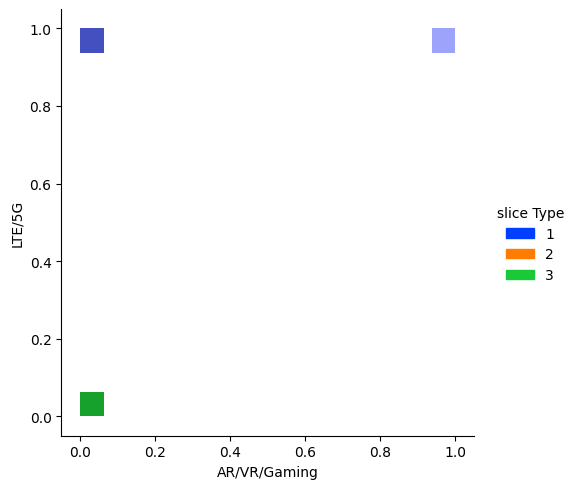

In [15]:
sns.displot(data = train_dataset,x = "AR/VR/Gaming",y = "LTE/5G",hue = "slice Type", palette = "bright")

<Axes: title={'center': "Train Dataset 'slice Type' with respect to 'Industry 4.0' feature"}, xlabel='slice Type', ylabel='Probability'>

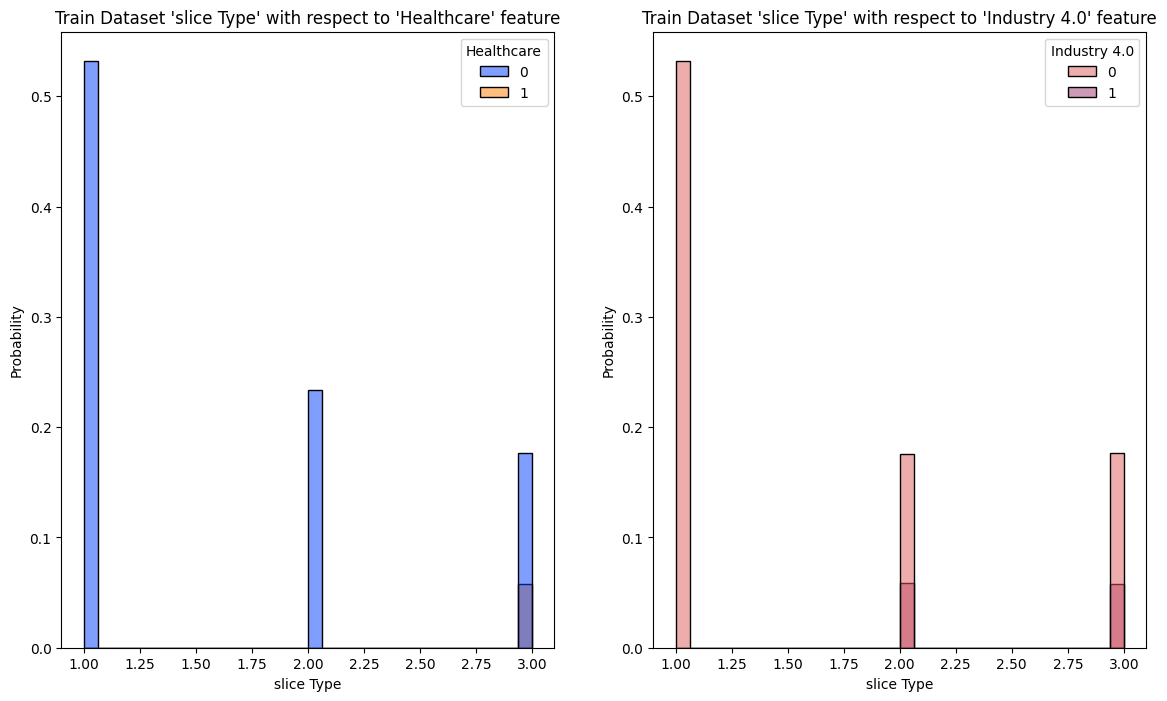

In [16]:
plt.figure(figsize = (14 ,8))

plt.subplot(1,2,1)
plt.title("Train Dataset 'slice Type' with respect to 'Healthcare' feature")
sns.histplot(data = train_dataset,x = "slice Type",hue = "Healthcare",stat = "probability", palette = "bright",alpha = 0.5)

plt.subplot(1,2,2)
plt.title("Train Dataset 'slice Type' with respect to 'Industry 4.0' feature")
sns.histplot(data = train_dataset,x = "slice Type",hue = "Industry 4.0",stat = "probability", palette = "flare",alpha = 0.5)

<Axes: title={'center': "Train Dataset 'Public Safety' and related 'GBR' with 'slice Type' hue."}, xlabel='Public Safety', ylabel='GBR'>

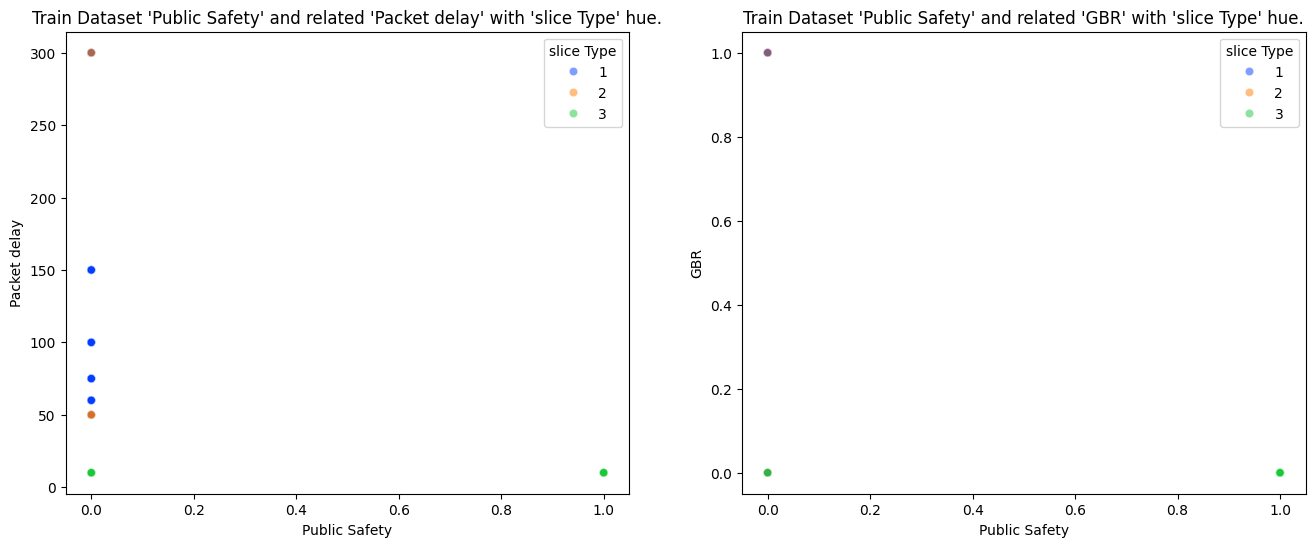

In [17]:
plt.figure(figsize = (16 ,6))

#Train Dataset 'Public Safety' and related 'Packet delay' with 'slice Type' hue.
plt.subplot(1,2,1)
plt.title("Train Dataset 'Public Safety' and related 'Packet delay' with 'slice Type' hue.")
sns.scatterplot(data = train_dataset,x = "Public Safety",y = "Packet delay",hue = "slice Type", palette = "bright",alpha = 0.5)

#Train Dataset 'Public Safety' and related 'GBR' with 'slice Type' hue.
plt.subplot(1,2,2)
plt.title("Train Dataset 'Public Safety' and related 'GBR' with 'slice Type' hue.")
sns.scatterplot(data = train_dataset,x = "Public Safety",y = "GBR",hue = "slice Type", palette = "bright",alpha = 0.5)

<Axes: title={'center': "Train Dataset 'Smart Transportation' and related 'Packet delay' with 'slice Type' hue."}, xlabel='Smart Transportation', ylabel='Packet delay'>

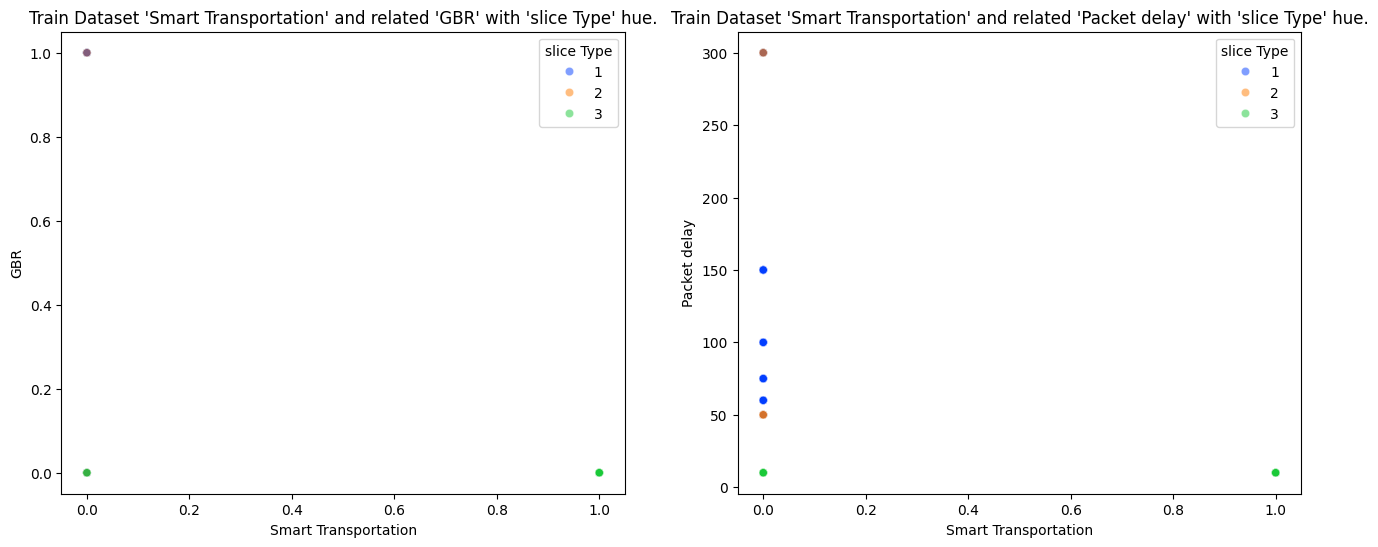

In [18]:
plt.figure(figsize = (16 ,6))

#Train Dataset 'Smart Transportation' and related 'GBR' with 'slice Type' hue.
plt.subplot(1,2,1)
plt.title("Train Dataset 'Smart Transportation' and related 'GBR' with 'slice Type' hue.")
sns.scatterplot(data = train_dataset,x = "Smart Transportation",y = "GBR",hue = "slice Type", palette = "bright",alpha = 0.5)

#Train Dataset 'Smart Transportation' and related 'Packet delay' with 'slice Type' hue.
plt.subplot(1,2,2)
plt.title("Train Dataset 'Smart Transportation' and related 'Packet delay' with 'slice Type' hue.")
sns.scatterplot(data = train_dataset,x = "Smart Transportation",y = "Packet delay",hue = "slice Type", palette = "bright",alpha = 0.5)

<Axes: title={'center': "Train Dataset 'Packet delay' with respect to 'Smartphone' feature"}, xlabel='Packet delay', ylabel='Probability'>

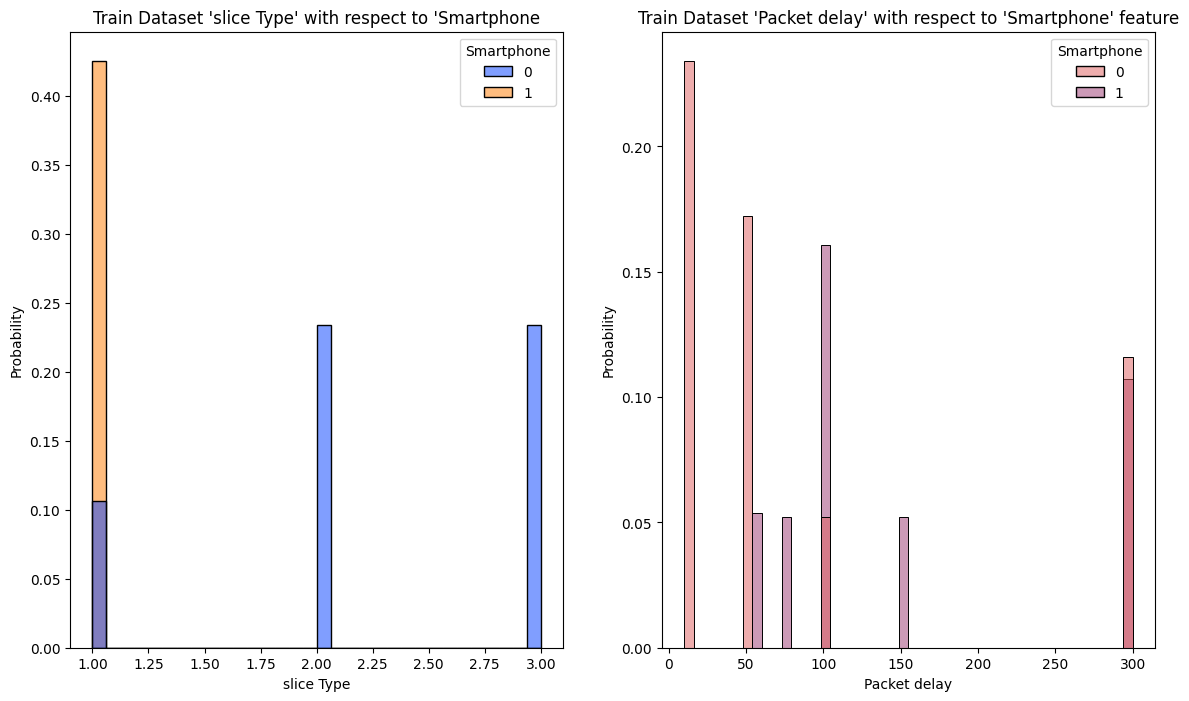

In [19]:
plt.figure(figsize = (14 ,8))

#For Train Dataset 'slice Type' with respect to 'Smartphone' feature.
plt.subplot(1,2,1)
plt.title("Train Dataset 'slice Type' with respect to 'Smartphone")
sns.histplot(data = train_dataset,x = "slice Type",hue = "Smartphone",stat = "probability", palette = "bright",alpha = 0.5)

#For Train Dataset 'Packet delay' with respect to 'Smartphone' feature.
plt.subplot(1,2,2)
plt.title("Train Dataset 'Packet delay' with respect to 'Smartphone' feature")
sns.histplot(data = train_dataset,x = "Packet delay",hue = "Smartphone",stat = "probability", palette = "flare",alpha = 0.5)

<Axes: title={'center': "Train Dataset 'LTE/5g Category' with respect to 'Smartphone' feature"}, xlabel='LTE/5g Category', ylabel='Probability'>

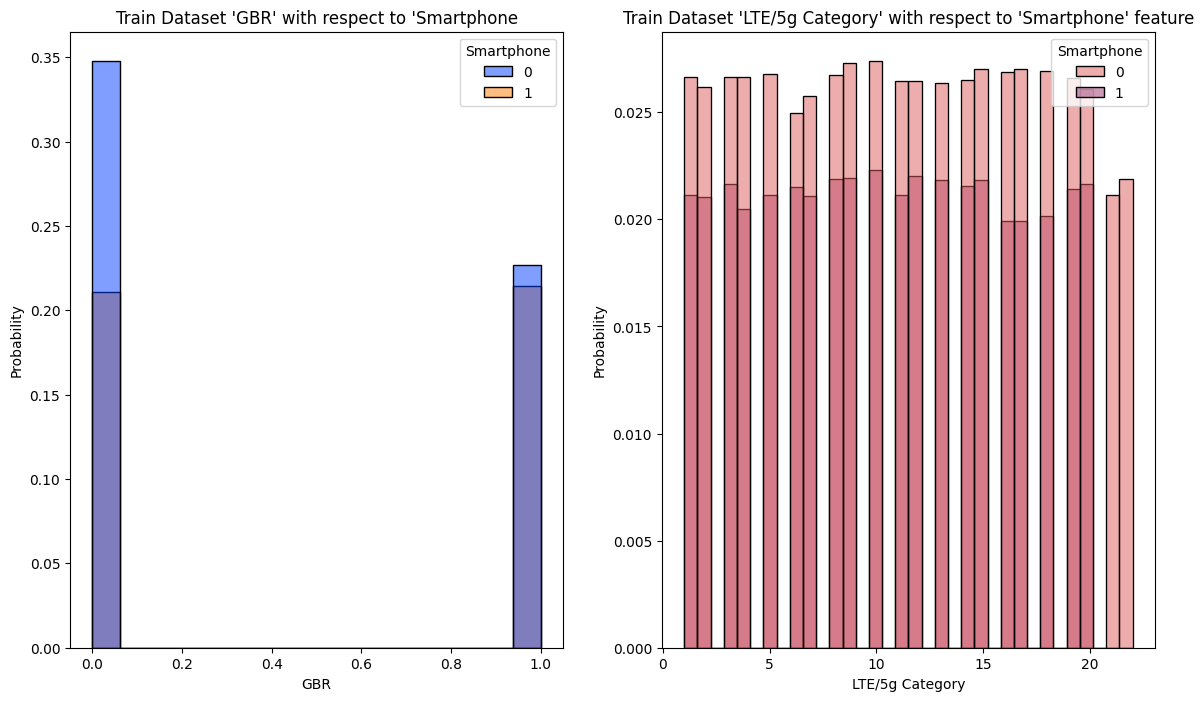

In [20]:
plt.figure(figsize = (14 ,8))

#For Train Dataset 'GBR' with respect to 'Smartphone' feature.
plt.subplot(1,2,1)
plt.title("Train Dataset 'GBR' with respect to 'Smartphone")
sns.histplot(data = train_dataset,x = "GBR",hue = "Smartphone",stat = "probability", palette = "bright",alpha = 0.5)

#For Train Dataset 'Packet delay' with respect to 'Smartphone' feature.
plt.subplot(1,2,2)
plt.title("Train Dataset 'LTE/5g Category' with respect to 'Smartphone' feature")
sns.histplot(data = train_dataset,x = "LTE/5g Category",hue = "Smartphone",stat = "probability", palette = "flare",alpha = 0.5)

Feature Extraction

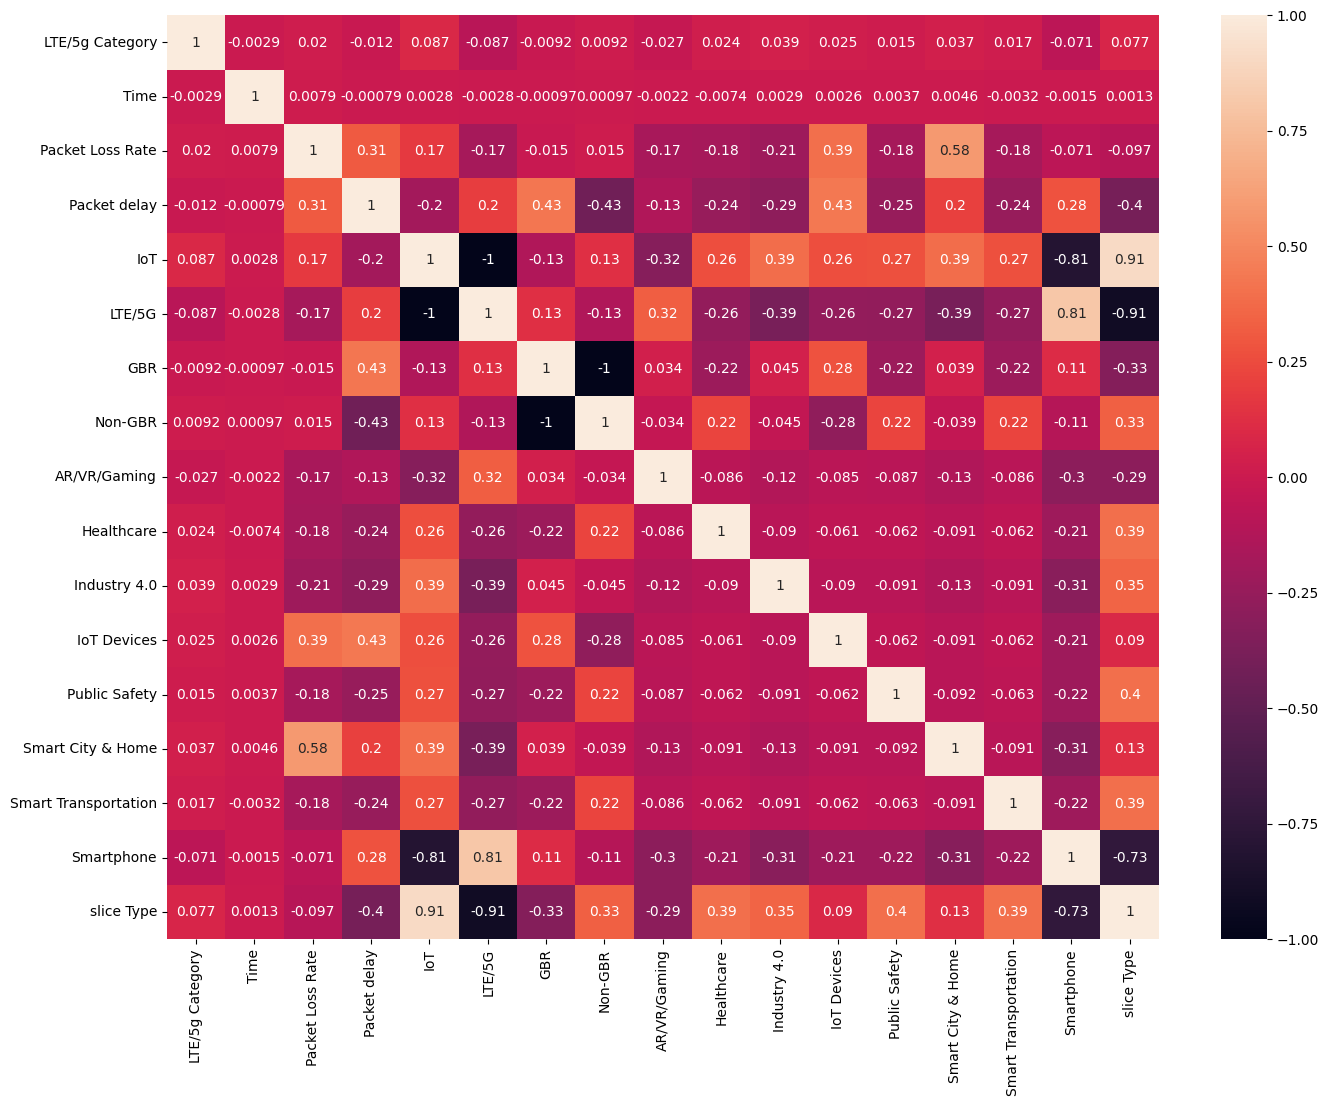

In [21]:
#Correlation Matrix.

corr_results = train_dataset.corr()
fig = plt.figure(figsize = (16,12))

sns.heatmap(corr_results,annot = True)
plt.show()

In [22]:
#Things to extract features :

#(1) Remove 'Time' feature. Reason => It has too small correlation coefficent.

#(2)Remove 'IoT' feature. Reason => It's and 'LTE/5g Category' have inverted correlation coefficents of each other.

#(3)Remove 'Non-GBR' feature. Reason => GBR feature is inverted identical of Non-GBR feature so there is no need to keep it.

In [23]:
train_dataset.drop(columns = ["Time","IoT"],inplace = True)
test_dataset.drop(columns = ["Time","IoT"],inplace = True)

In [24]:
train_dataset.head(5)

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0.000001,10,0,0,1,0,0,0,0,1,0,0,0,3
1,18,0.001000,100,1,1,0,1,0,0,0,0,0,0,0,1
2,17,0.000001,300,1,0,1,0,0,0,0,0,0,0,1,1
3,3,0.010000,100,1,0,1,0,0,0,0,0,0,0,1,1
4,9,0.010000,50,0,0,1,0,0,0,0,0,1,0,0,2


In [25]:
test_dataset.head(5)

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,15,0.001000,100,1,1,0,1,0,0,0,0,0,0,0
1,14,0.000001,10,0,0,1,0,0,0,0,0,0,1,0
2,11,0.001000,50,0,1,0,0,0,1,0,0,0,0,0
3,20,0.001000,50,0,1,0,0,0,1,0,0,0,0,0
4,2,0.001000,50,1,0,1,1,0,0,0,0,0,0,0


DATA PREPROCESSING

In [26]:
def label_processing(df):
    #No Standartization because the features are classification datas.
    target_y = df.iloc[:,-1:].values
    target_y = keras.utils.to_categorical(target_y)
    return target_y

In [27]:
#Get the processed y labels
train_y = label_processing(train_dataset)

In [28]:
print(train_dataset.iloc[:,-1:].values.shape)
print(train_y)

(31583, 1)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


TRAIN AND VALIDATION SPLITTING¶


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(train_dataset.iloc[:,:-1],train_y,random_state=43, test_size= 0.4)

In [30]:
print(f"{X_train.shape} , {X_val.shape}")

(18949, 14) , (12634, 14)


In [31]:
#Split test and val dataset.
X_val,X_test,Y_val,Y_test = train_test_split(X_val,Y_val,random_state = 43,test_size = 0.3)

In [32]:
print(f"{X_train.shape}, {X_test.shape}, {X_val.shape}")

(18949, 14), (3791, 14), (8843, 14)


DEEP NEURAL NETWORK

In [33]:
from keras.layers import Conv1D,ConvLSTM1D,Flatten,Dense,BatchNormalization,Dropout
from keras.models import Sequential
def build_model():
    model = Sequential()
    #Input layer
    model.add(Dense(8,activation = "relu",kernel_initializer = "normal",input_dim = 14))
    #Hidden layer 1
    model.add(Dense(16,activation = "relu",kernel_initializer = "normal"))
    #Dropout and Batch Normalization 1
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #Hidden layer 2
    model.add(Dense(32,activation = "relu",kernel_initializer = "normal"))
    #Dropout and Batch Normalization 2
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #Flatten
    model.add(Flatten())
    #Fully connected layer
    model.add(Dense(32,activation = "relu",kernel_initializer = "normal"))
    #Output layer
    model.add(Dense(4,activation = "softmax",kernel_initializer = "normal"))
    return model

In [34]:
from keras.layers import Conv1D,ConvLSTM1D,Flatten,Dense,BatchNormalization
from keras.models import Sequential
def conv_model():
    model = Sequential()
    #Input layer
    model.add(Conv1D(8,3,activation = "relu",kernel_initializer = "normal",input_dim = 13))
    #Hidden layer 1
    model.add(Conv1D(16,3,activation = "relu",kernel_initializer = "normal"))
    #Dropout and Batch Normalization 1
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #Hidden layer 2
    model.add(Conv1D(32,3,activation = "relu",kernel_initializer = "normal"))
    #Dropout and Batch Normalization 2
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #Flatten
    model.add(Flatten())
    #Fully connected layer
    model.add(Dense(32,activation = "relu",kernel_initializer = "normal"))
    #Output layer
    model.add(Dense(4,activation = "softmax",kernel_initializer = "normal"))
    return model

In [35]:
model = build_model()
model.summary()

c:\Users\saumy\OneDrive\Carleton University\Winter-term-1\5G-Networks\project\5gProject\myML\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,188 (8.55 KB)

 Trainable params: 2,092 (8.17 KB)

 Non-trainable params: 96 (384.00 B)

In [36]:
color_map = defaultdict(dict)
color_map[Conv1D]['fill'] = 'orange'
color_map[Dropout]['fill'] = 'black'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model, legend=True, draw_volume=False, spacing=20, color_map=color_map, to_file="/images/dnn_architecture.png")


AttributeError: 'Dense' object has no attribute 'output_shape'

In [ ]:
from tensorflow.keras.utils import plot_model
keras.utils.plot_model(model,to_file = "dnn_model_show.png",dpi = 52,show_shapes = True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


Compile Model

In [37]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = "categorical_crossentropy",metrics = ["accuracy"])

In [38]:
#Add dimension for convolution.
X_train = np.expand_dims(X_train,axis = -1)
X_val = np.expand_dims(X_val,axis = -1)

TRAIN MODEL

In [39]:
history = model.fit(X_train,Y_train,batch_size = 64,epochs = 20,
                    validation_data=(X_val,Y_val),
                    callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3))

Epoch 1/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7273 - loss: 0.8153 - val_accuracy: 0.5313 - val_loss: 0.7818
Epoch 2/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9248 - loss: 0.1770 - val_accuracy: 1.0000 - val_loss: 0.0696
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9635 - loss: 0.0871 - val_accuracy: 0.8851 - val_loss: 0.6300
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9677 - loss: 0.0878 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9770 - loss: 0.0584 - val_accuracy: 1.0000 - val_loss: 8.6390e-04
Epoch 6/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9791 - loss: 0.0557 - val_accuracy: 0.8935 - val_loss: 0.1352
Epoch 7/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9713 - loss: 0.0712 - val_accuracy: 1.0000 - val_loss: 5.0485e-04
Epoch 8/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9821 - loss: 0.0446 - val

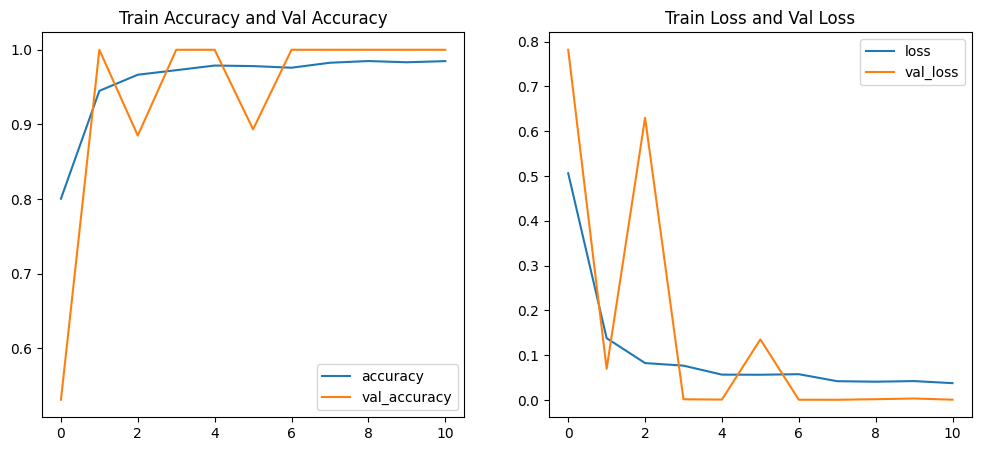

In [40]:
fig = plt.figure(figsize = (12,5))

epochs = len(history.history["accuracy"])
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.title("Train Accuracy and Val Accuracy")
plt.plot(range(epochs),history.history["accuracy"])
plt.plot(range(epochs),history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])

plt.subplot(1,2,2)
plt.title("Train Loss and Val Loss")
plt.plot(range(epochs),history.history["loss"])
plt.plot(range(epochs),history.history["val_loss"])
plt.legend(["loss","val_loss"])

PREDICTION

In [71]:
#Evaluation of model on test dataset.
model.evaluate(X_test,Y_test)

IndexError: tuple index out of range

In [43]:
#Prediction on X_test
preds_X_test = model.predict(X_test)
#Decode Y_test and predictions on X_test
Y_test = [np.argmax(Y_test[i]) for i in range(len(Y_test))]
preds_X_test_decoded = [np.argmax(preds_X_test[i]) for i in range(len(preds_X_test))]

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [44]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,preds_X_test_decoded))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2061
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       863

    accuracy                           1.00      3791
   macro avg       1.00      1.00      1.00      3791
weighted avg       1.00      1.00      1.00      3791



In [45]:
preds = model.predict(test_dataset)
print(preds)

987/987 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[[3.9753845e-06 9.9923968e-01 7.5250032e-04 3.7666264e-06]
 [3.9320194e-06 2.4928533e-05 3.1791475e-05 9.9993932e-01]
 [7.6787637e-07 1.5012500e-03 9.9816728e-01 3.3071896e-04]
 ...
 [4.0199393e-06 3.1143049e-05 4.5716373e-05 9.9991918e-01]
 [1.5116776e-06 9.9984634e-01 1.5097616e-04 1.2122335e-06]
 [4.0199434e-06 3.1143049e-05 4.5716330e-05 9.9991918e-01]]


In [46]:
#Decode predictions.
preds_decoded = [np.argmax(preds[i]) for i in range(len(preds))]

In [47]:
test_dataset["predicted_slice_type"] = preds_decoded

In [48]:
test_dataset

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,predicted_slice_type
0,15,0.001000,100,1,1,0,1,0,0,0,0,0,0,0,1
1,14,0.000001,10,0,0,1,0,0,0,0,0,0,1,0,3
2,11,0.001000,50,0,1,0,0,0,1,0,0,0,0,0,2
3,20,0.001000,50,0,1,0,0,0,1,0,0,0,0,0,2
4,2,0.001000,50,1,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31579,9,0.000001,10,0,0,1,0,0,0,0,0,0,1,0,3
31580,20,0.000001,10,0,0,1,0,0,1,0,0,0,0,0,3
31581,8,0.000001,10,0,0,1,0,0,1,0,0,0,0,0,3
31582,13,0.010000,75,1,0,1,0,0,0,0,0,0,0,1,1


In [49]:
#Kolmogorov Smirnov test
from scipy.stats import ks_2samp
print("Kolmogorov Smirnov Test")
print(ks_2samp(train_dataset["slice Type"],test_dataset["predicted_slice_type"]))
#t-test
from scipy.stats import ttest_ind
print(ttest_ind(train_dataset["slice Type"],test_dataset["predicted_slice_type"]))

Kolmogorov Smirnov Test
KstestResult(statistic=1.4820793033720747e-05, pvalue=1.0, statistic_location=1, statistic_sign=-1)
TtestResult(statistic=0.003394705329121528, pvalue=0.9972914329520145, df=63165.0)


XGBOOST MODEL AND PREDICTION¶


In [50]:
train_dataset.iloc[:,:-1]

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,14,0.000001,10,0,0,1,0,0,0,0,1,0,0,0
1,18,0.001000,100,1,1,0,1,0,0,0,0,0,0,0
2,17,0.000001,300,1,0,1,0,0,0,0,0,0,0,1
3,3,0.010000,100,1,0,1,0,0,0,0,0,0,0,1
4,9,0.010000,50,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31578,14,0.010000,100,1,0,1,0,0,0,0,0,0,0,1
31579,12,0.010000,50,0,0,1,0,0,0,0,0,1,0,0
31580,18,0.010000,300,0,1,0,0,0,0,1,0,0,0,0
31581,8,0.000001,10,0,0,1,0,1,0,0,0,0,0,0


In [52]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate = 0.1,n_estimators = 10,objective = "multi:softmax",num_class = 3)
#Label encoder for training to start slices from 0.
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
xgb_y_train = LE.fit_transform(train_dataset["slice Type"])
#Training
xgb_model.fit(train_dataset.iloc[:,:-1],xgb_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [53]:
#Prediction on x test
xgb_preds = xgb_model.predict(X_test)
xgb_preds = LE.inverse_transform(xgb_preds)
#Classification report
print(classification_report(Y_test,xgb_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2061
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       863

    accuracy                           1.00      3791
   macro avg       1.00      1.00      1.00      3791
weighted avg       1.00      1.00      1.00      3791



In [54]:
#Prediction on test dataset
xgb_preds_test = xgb_model.predict(test_dataset.iloc[:,:-1])
xgb_preds_test = LE.inverse_transform(xgb_preds_test)

In [55]:
#Kolmogorov Smirnov test
from scipy.stats import ks_2samp
print("Kolmogorov Smirnov Test")
print(ks_2samp(train_dataset["slice Type"],xgb_preds_test))
#t-test
from scipy.stats import ttest_ind
print(ttest_ind(train_dataset["slice Type"],xgb_preds_test))

Kolmogorov Smirnov Test
KstestResult(statistic=1.4820793033720747e-05, pvalue=1.0, statistic_location=1, statistic_sign=-1)
TtestResult(statistic=0.003394705329121528, pvalue=0.9972914329520145, df=63165.0)


CATBOOST MODEL AND PREDICTION¶


In [56]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations = 2,learning_rate = 1,loss_function = "MultiClass")

In [57]:
#Label encoder for slice types
catboost_model.fit(train_dataset.iloc[:,:-1],train_dataset["slice Type"])

0:	learn: 0.0965582	total: 152ms	remaining: 152ms
1:	learn: 0.0337748	total: 160ms	remaining: 0us


In [58]:
#Prediction on x test
catboost_model_preds = catboost_model.predict(X_test)
print(classification_report(Y_test,catboost_model_preds))
print(catboost_model_preds)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2061
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       863

    accuracy                           1.00      3791
   macro avg       1.00      1.00      1.00      3791
weighted avg       1.00      1.00      1.00      3791

[[1]
 [1]
 [3]
 ...
 [2]
 [2]
 [1]]


In [59]:
#Prediction on given test dataset
catboost_model_test_preds = catboost_model.predict(test_dataset.iloc[:,:-1])

In [60]:
catboost_model_test_preds.flatten()

array([1, 3, 2, ..., 3, 1, 3], dtype=int64)

In [61]:
#Kolmogorov Smirnov test
from scipy.stats import ks_2samp
print("Kolmogorov Smirnov Test")
print(ks_2samp(train_dataset["slice Type"],catboost_model_test_preds.flatten()))
#t-test
from scipy.stats import ttest_ind
print(ttest_ind(train_dataset["slice Type"],catboost_model_test_preds.flatten()))

Kolmogorov Smirnov Test
KstestResult(statistic=1.4820793033720747e-05, pvalue=1.0, statistic_location=1, statistic_sign=-1)
TtestResult(statistic=0.003394705329121528, pvalue=0.9972914329520145, df=63165.0)


COMPARISION OF TRAIN DATASET AND TEST DATASET WITH DNN PREDICTIONS

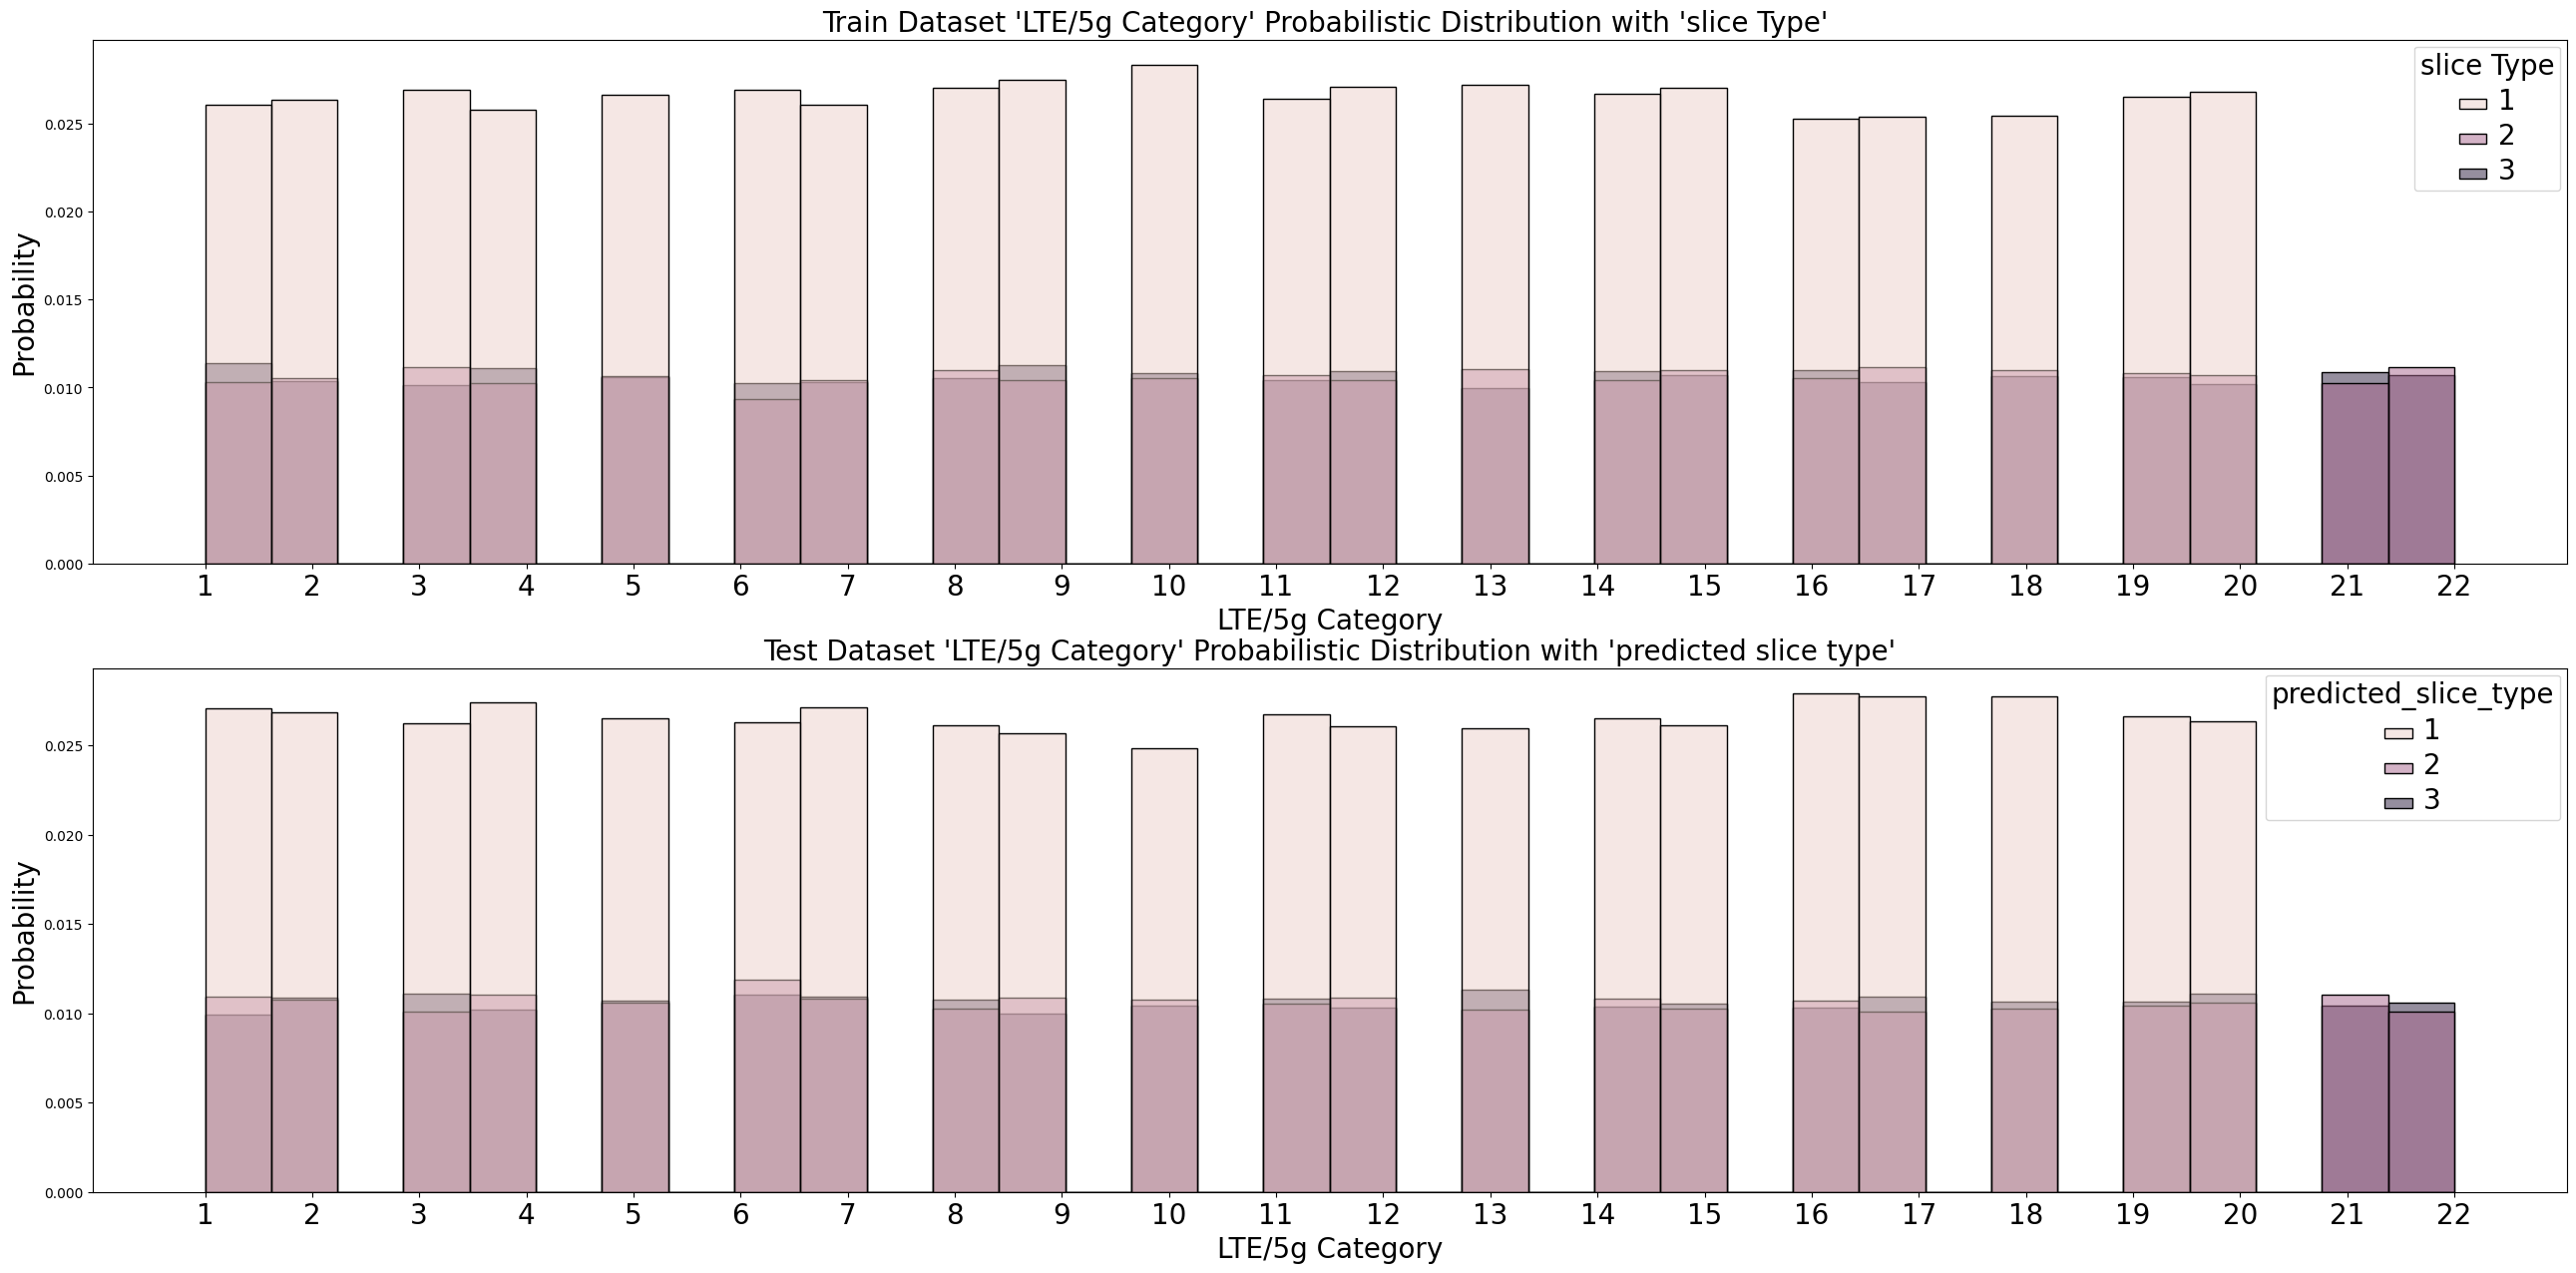

In [62]:
fig = plt.figure(figsize = (32,15))
#For train dataset
plt.subplot(2,1,1)
plt.title("Train Dataset 'LTE/5g Category' Probabilistic Distribution with 'slice Type' ",fontsize =20)
train_lte_hist = sns.histplot(data = train_dataset,x = "LTE/5g Category",stat = "probability",
                              hue = "slice Type")

plt.xticks(train_dataset["LTE/5g Category"].value_counts().index,fontsize = 20)
plt.xlabel("LTE/5g Category",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)

plt.setp(train_lte_hist.get_legend().get_texts(),fontsize = '20')
plt.setp(train_lte_hist.get_legend().get_title(),fontsize = '20');
#For test dataset
plt.subplot(2,1,2)
plt.title("Test Dataset 'LTE/5g Category' Probabilistic Distribution with 'predicted slice type'",fontsize =20)
test_lte_hist = sns.histplot(data = test_dataset,x = "LTE/5g Category",stat = "probability",
                             hue = "predicted_slice_type")

plt.xticks(test_dataset["LTE/5g Category"].value_counts().index,fontsize = 20)
plt.xlabel("LTE/5g Category",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)

plt.setp(test_lte_hist.get_legend().get_texts(),fontsize = '20')
plt.setp(test_lte_hist.get_legend().get_title(),fontsize = '20');

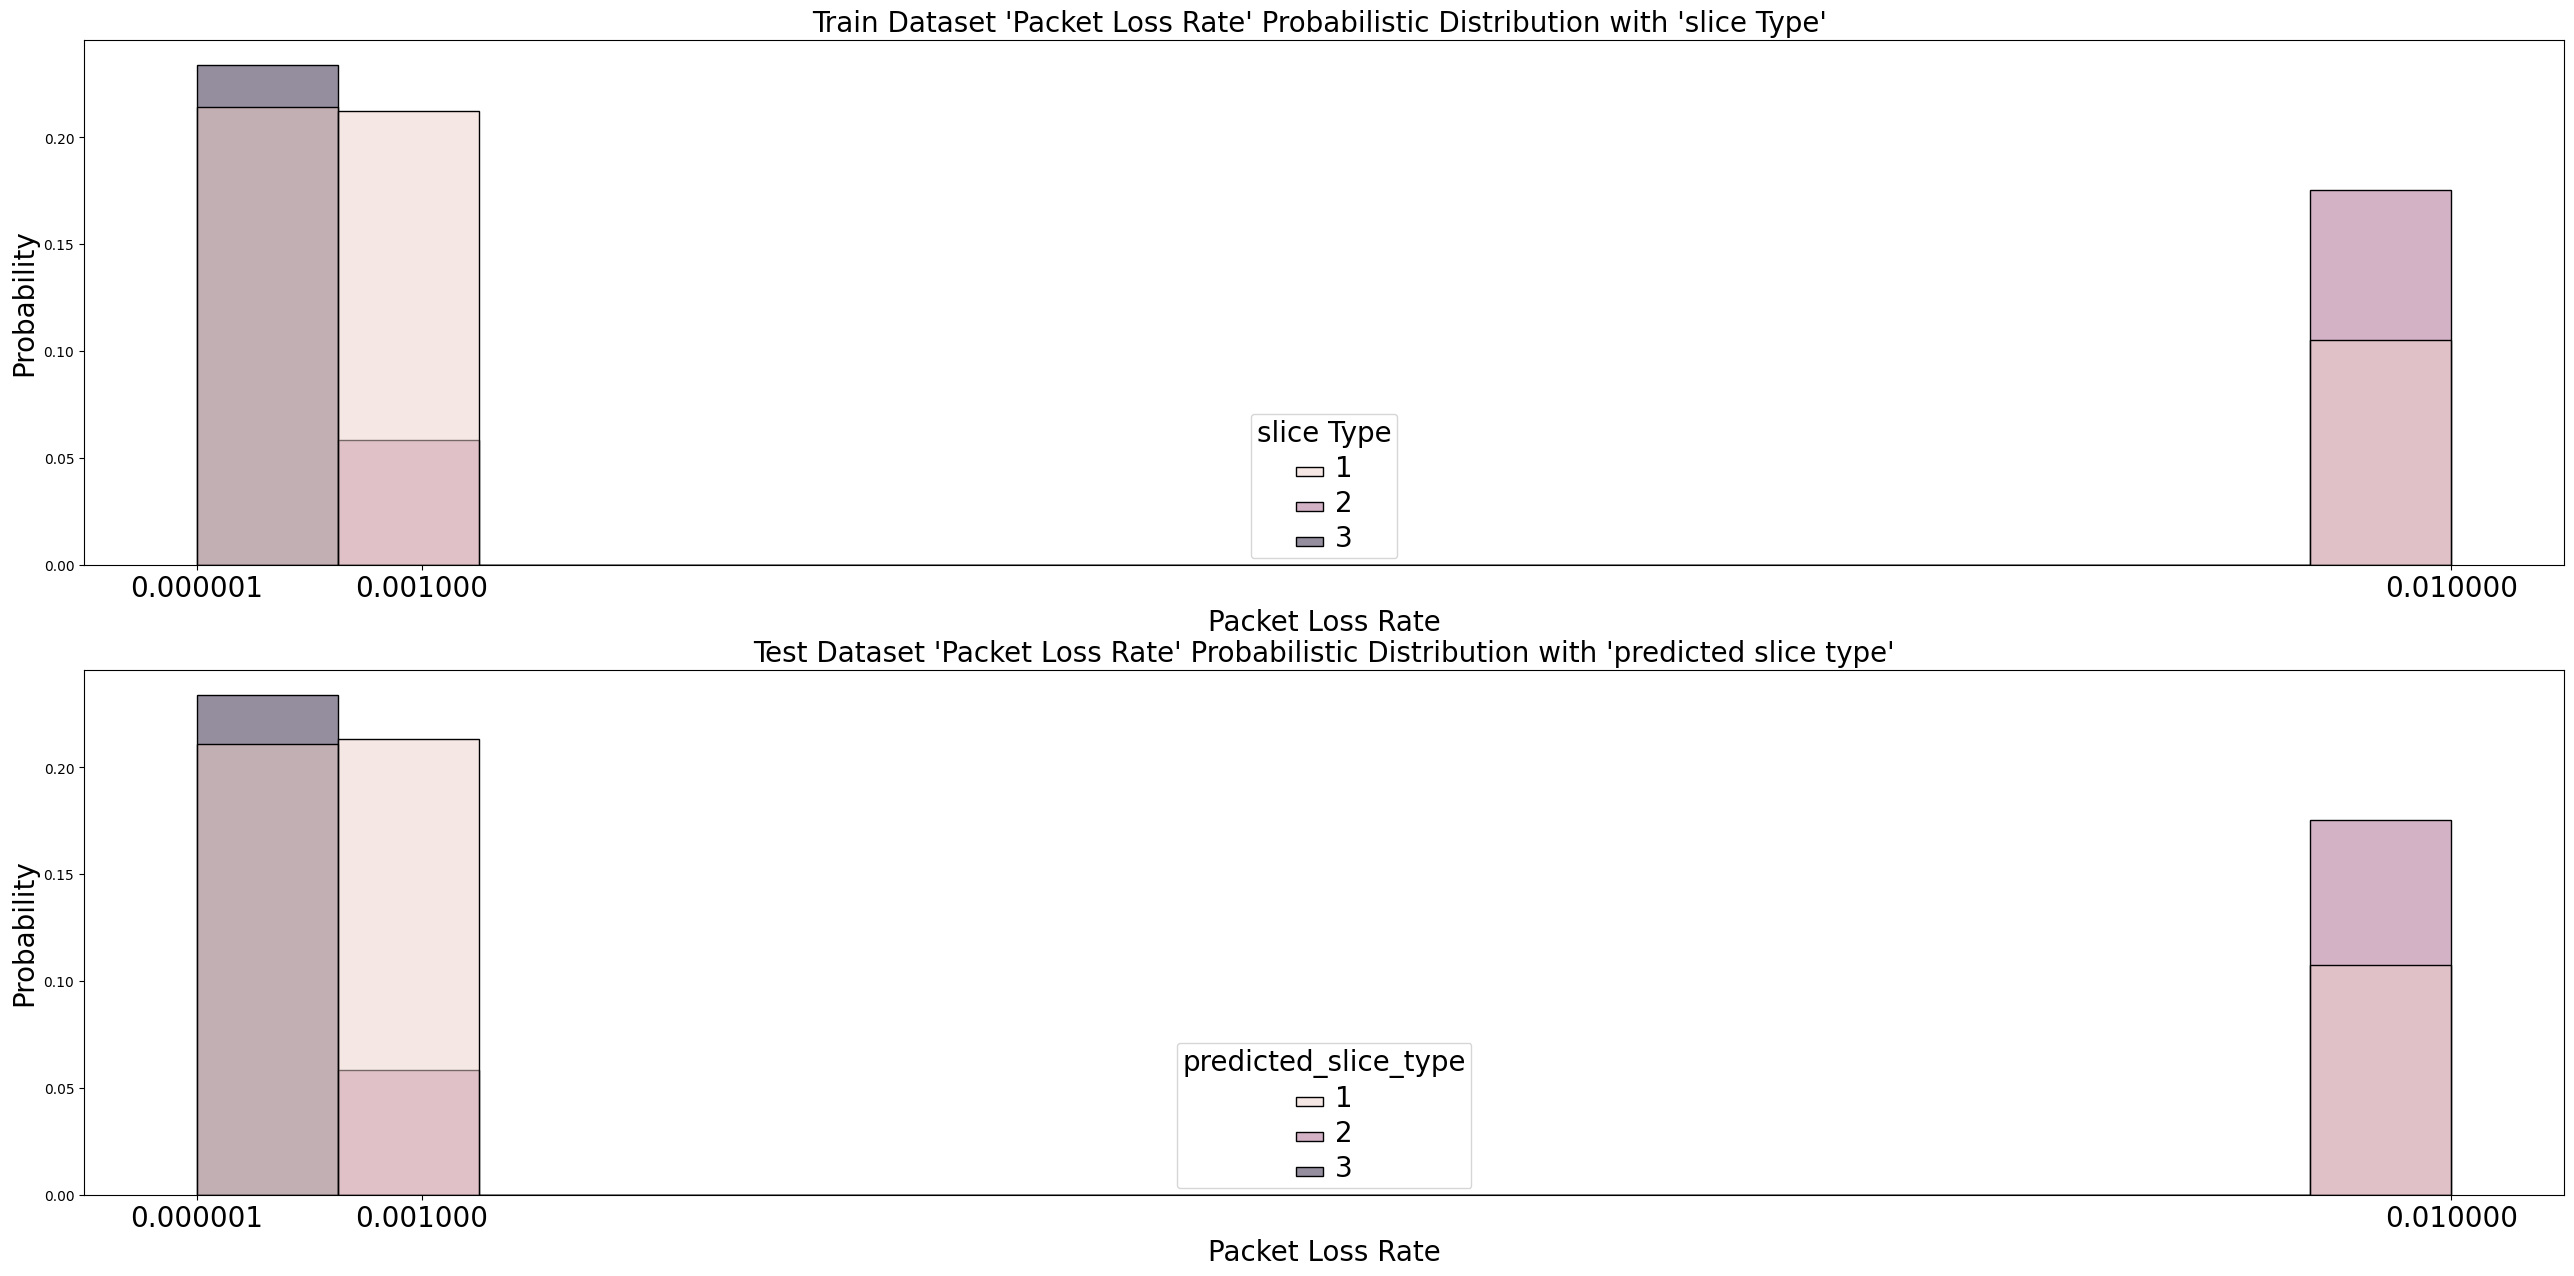

In [63]:
fig = plt.figure(figsize = (32,15))
#For train dataset
plt.subplot(2,1,1)
plt.title("Train Dataset 'Packet Loss Rate' Probabilistic Distribution with 'slice Type' ",fontsize =20)
train_packet_loss_hist = sns.histplot(data = train_dataset,x = "Packet Loss Rate",stat = "probability",
                              hue = "slice Type")

plt.xticks(train_dataset["Packet Loss Rate"].value_counts().index,fontsize = 20)
plt.xlabel("Packet Loss Rate",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)

plt.setp(train_packet_loss_hist.get_legend().get_texts(),fontsize = '20')
plt.setp(train_packet_loss_hist.get_legend().get_title(),fontsize = '20');
#For test dataset
plt.subplot(2,1,2)
plt.title("Test Dataset 'Packet Loss Rate' Probabilistic Distribution with 'predicted slice type'",
          fontsize =20)
test_packet_loss_hit = sns.histplot(data = test_dataset,x = "Packet Loss Rate",stat = "probability",
                                    hue = "predicted_slice_type")

plt.xticks(test_dataset["Packet Loss Rate"].value_counts().index,fontsize = 20)
plt.xlabel("Packet Loss Rate",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)

plt.setp(test_packet_loss_hit.get_legend().get_texts(),fontsize = '20')
plt.setp(test_packet_loss_hit.get_legend().get_title(),fontsize = '20');

<Axes: title={'center': "Test Dataset 'Packet delay' probability distributions with 'predicted slice Type' "}, xlabel='Packet delay', ylabel='Probability'>

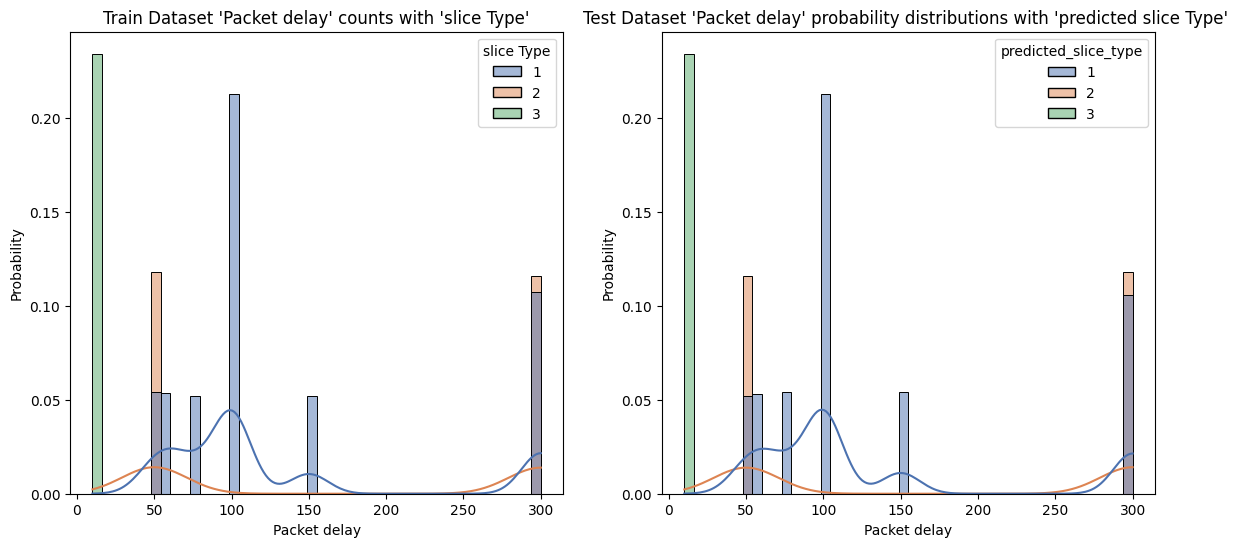

In [64]:
plt.figure(figsize = (14,6))
#For train dataset
plt.subplot(1,2,1)
plt.title("Train Dataset 'Packet delay' counts with 'slice Type'")
sns.histplot(data = train_dataset,x = "Packet delay",hue = "slice Type",palette = "deep",
             stat = "probability",alpha = 0.5,kde = True)
#For test dataset
plt.subplot(1,2,2)
plt.title("Test Dataset 'Packet delay' probability distributions with 'predicted slice Type' ")
sns.histplot(data = test_dataset,x = "Packet delay",hue = "predicted_slice_type",
             palette = "deep",stat = "probability",alpha = 0.5,
            kde = True)

<Axes: title={'center': "Test Dataset 'GBR' probability with 'predicted slice Type'"}, xlabel='predicted_slice_type', ylabel='Probability'>

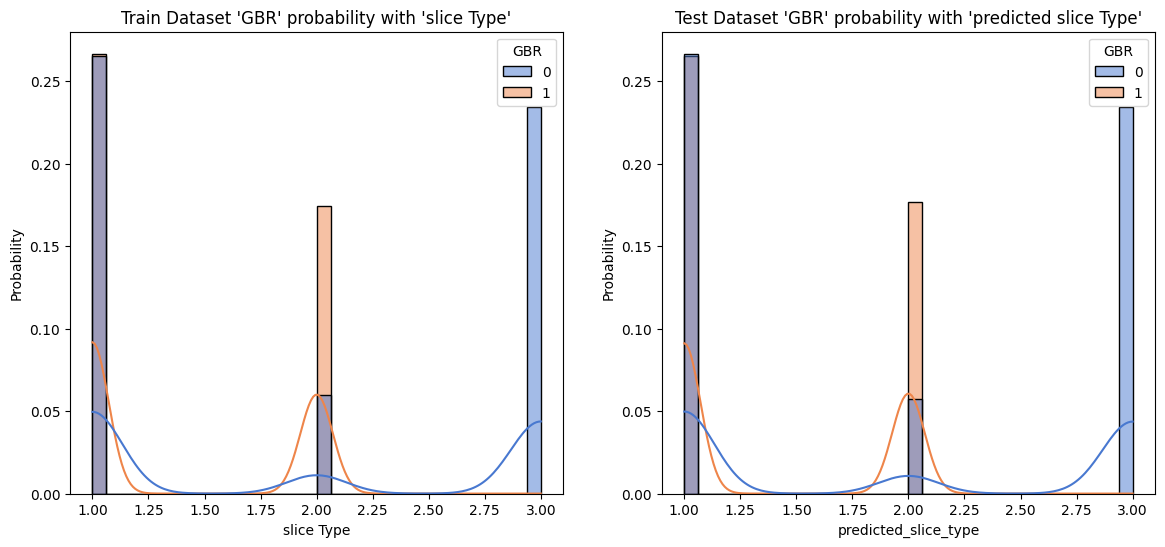

In [65]:
plt.figure(figsize = (14,6))
#For IoT
plt.subplot(1,2,1)
plt.title("Train Dataset 'GBR' probability with 'slice Type'")
sns.histplot(data = train_dataset,x = "slice Type",hue = "GBR",
             palette = "muted",stat = "probability",alpha = 0.5,kde = True)
#For LTE/5G
plt.subplot(1,2,2)
plt.title("Test Dataset 'GBR' probability with 'predicted slice Type'")
sns.histplot(data = test_dataset,x = "predicted_slice_type",hue = "GBR",palette = "muted",
             stat = "probability",alpha = 0.5,kde = True)

<Axes: title={'center': "Test Dataset 'AR/VR/Gaming' probability with 'predicted slice Type'"}, xlabel='predicted_slice_type', ylabel='Probability'>

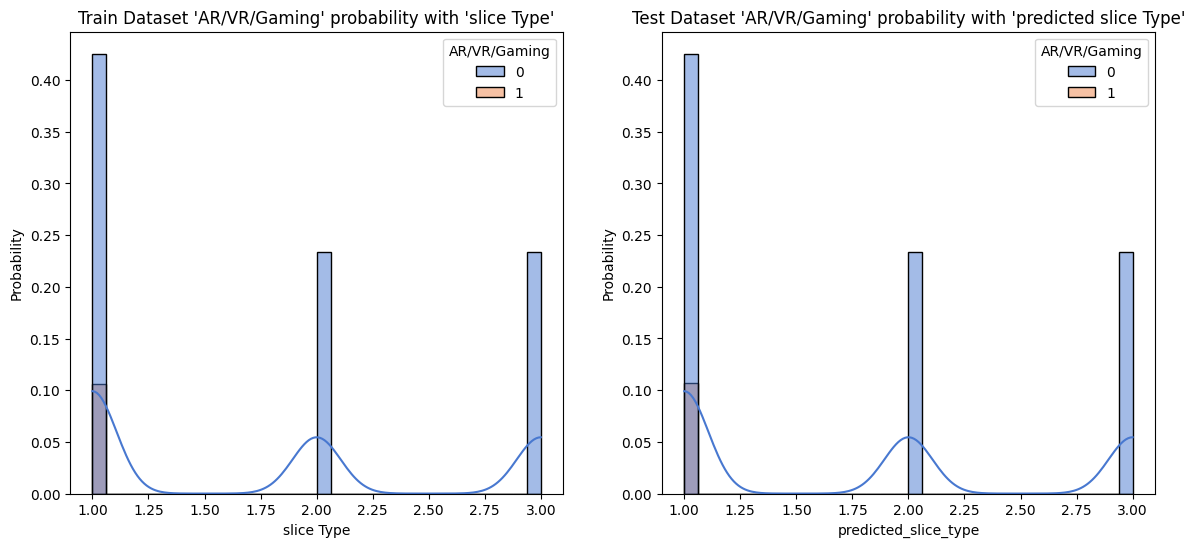

In [66]:
plt.figure(figsize = (14,6))
#For train dataset
plt.subplot(1,2,1)
plt.title("Train Dataset 'AR/VR/Gaming' probability with 'slice Type'")
sns.histplot(data = train_dataset,x = "slice Type",hue = "AR/VR/Gaming",
             palette = "muted",stat = "probability",alpha = 0.5,kde = True)
#For test dataset
plt.subplot(1,2,2)
plt.title("Test Dataset 'AR/VR/Gaming' probability with 'predicted slice Type'")
sns.histplot(data = test_dataset,x = "predicted_slice_type",hue = "AR/VR/Gaming",palette = "muted",
             stat = "probability",alpha = 0.5,kde = True)

<Axes: title={'center': "Test Dataset 'Healthcare' probability with 'predicted slice Type'"}, xlabel='predicted_slice_type', ylabel='Probability'>

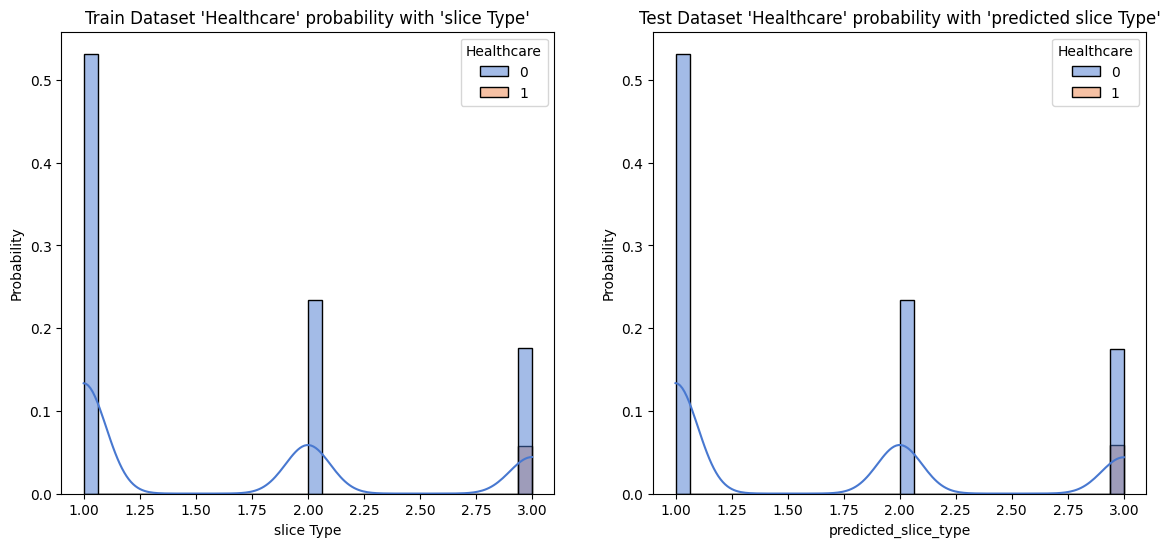

In [67]:
#Healthcare
plt.figure(figsize = (14,6))
#For train dataset
plt.subplot(1,2,1)
plt.title("Train Dataset 'Healthcare' probability with 'slice Type'")
sns.histplot(data = train_dataset,x = "slice Type",hue = "Healthcare",
             palette = "muted",stat = "probability",alpha = 0.5,kde = True)
#For test dataset
plt.subplot(1,2,2)
plt.title("Test Dataset 'Healthcare' probability with 'predicted slice Type'")
sns.histplot(data = test_dataset,x = "predicted_slice_type",hue = "Healthcare",palette = "muted",
             stat = "probability",alpha = 0.5,kde = True)

<Axes: title={'center': "Test Dataset 'Industry 4.0' probability with 'predicted slice Type'"}, xlabel='predicted_slice_type', ylabel='Probability'>

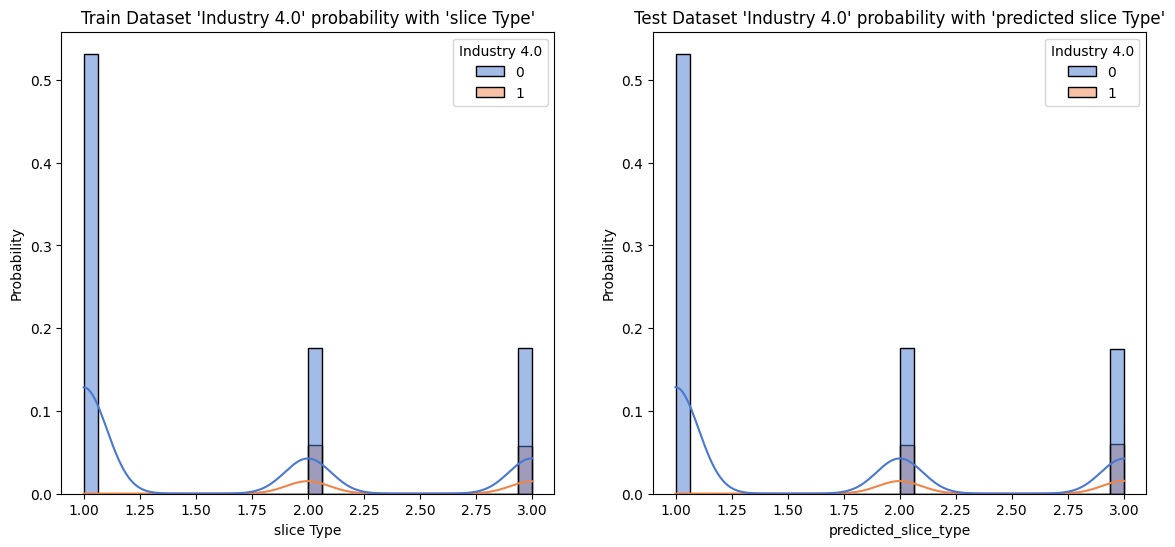

In [68]:
#Industry 4.0
plt.figure(figsize = (14,6))
#For train dataset
plt.subplot(1,2,1)
plt.title("Train Dataset 'Industry 4.0' probability with 'slice Type'")
sns.histplot(data = train_dataset,x = "slice Type",hue = "Industry 4.0",
             palette = "muted",stat = "probability",alpha = 0.5,kde = True)
#For test dataset
plt.subplot(1,2,2)
plt.title("Test Dataset 'Industry 4.0' probability with 'predicted slice Type'")
sns.histplot(data = test_dataset,x = "predicted_slice_type",hue = "Industry 4.0",palette = "muted",
             stat = "probability",alpha = 0.5,kde = True)

<Axes: title={'center': "Test Dataset 'Public Safety' probability with 'predicted slice Type'"}, xlabel='predicted_slice_type', ylabel='Probability'>

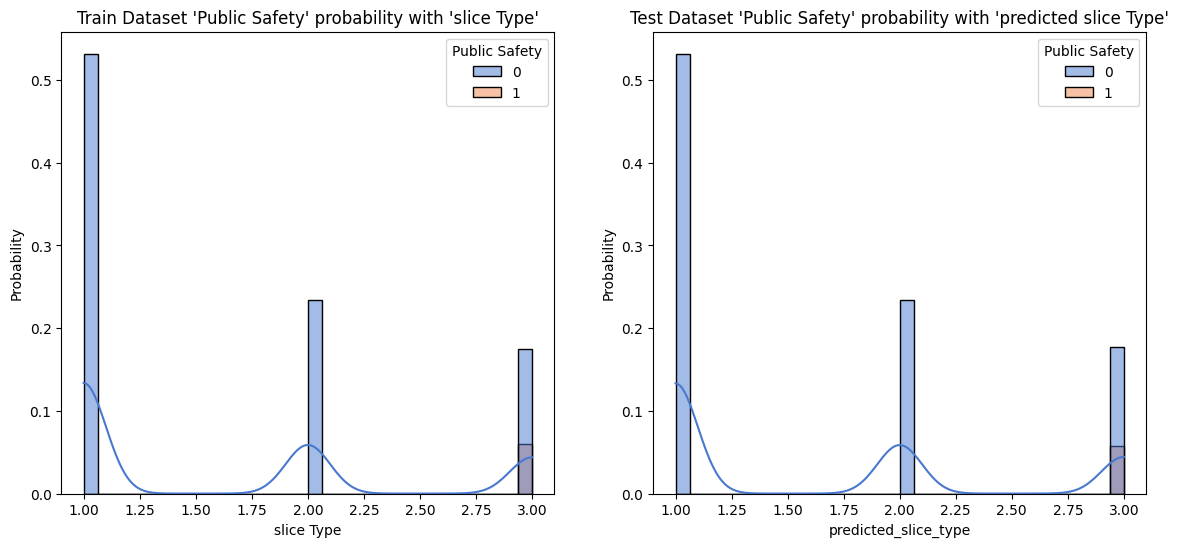

In [69]:
#Public Safety
plt.figure(figsize = (14,6))
#For train dataset
plt.subplot(1,2,1)
plt.title("Train Dataset 'Public Safety' probability with 'slice Type'")
sns.histplot(data = train_dataset,x = "slice Type",hue = "Public Safety",
             palette = "muted",stat = "probability",alpha = 0.5,kde = True)
#For test dataset
plt.subplot(1,2,2)
plt.title("Test Dataset 'Public Safety' probability with 'predicted slice Type'")
sns.histplot(data = test_dataset,x = "predicted_slice_type",hue = "Public Safety",palette = "muted",
             stat = "probability",alpha = 0.5,kde = True)

<Axes: title={'center': "Test Dataset 'Smart Transportation' probability with 'predicted slice Type'"}, xlabel='predicted_slice_type', ylabel='Probability'>

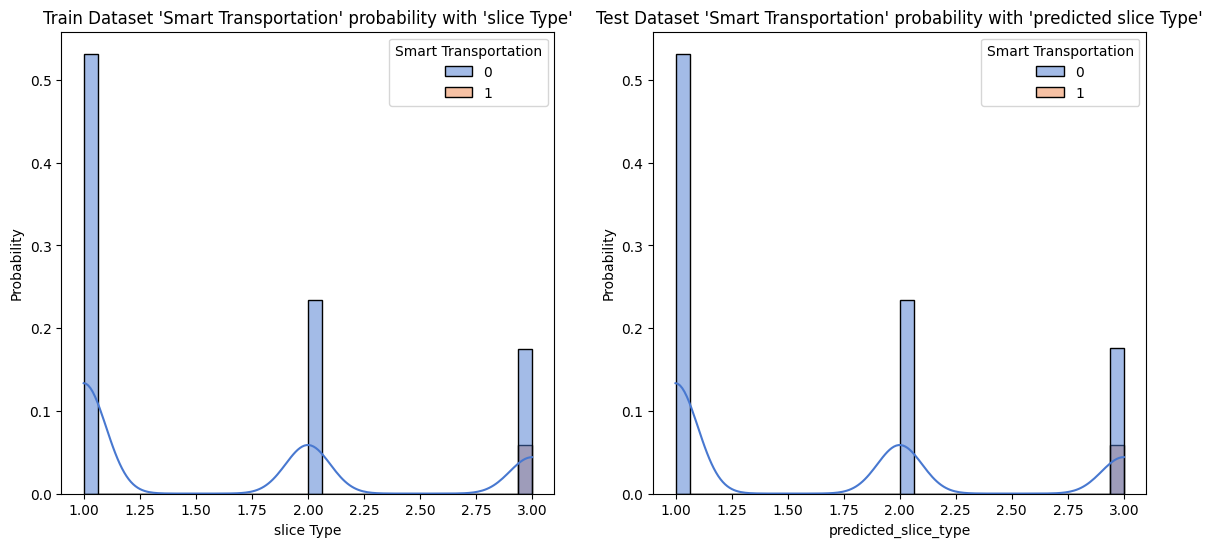

In [70]:
#Smart Transportation
plt.figure(figsize = (14,6))
#For train dataset
plt.subplot(1,2,1)
plt.title("Train Dataset 'Smart Transportation' probability with 'slice Type'")
sns.histplot(data = train_dataset,x = "slice Type",hue = "Smart Transportation",
             palette = "muted",stat = "probability",alpha = 0.5,kde = True)
#For test dataset
plt.subplot(1,2,2)
plt.title("Test Dataset 'Smart Transportation' probability with 'predicted slice Type'")
sns.histplot(data = test_dataset,x = "predicted_slice_type",hue = "Smart Transportation",
             palette = "muted",stat = "probability",alpha = 0.5,kde = True)

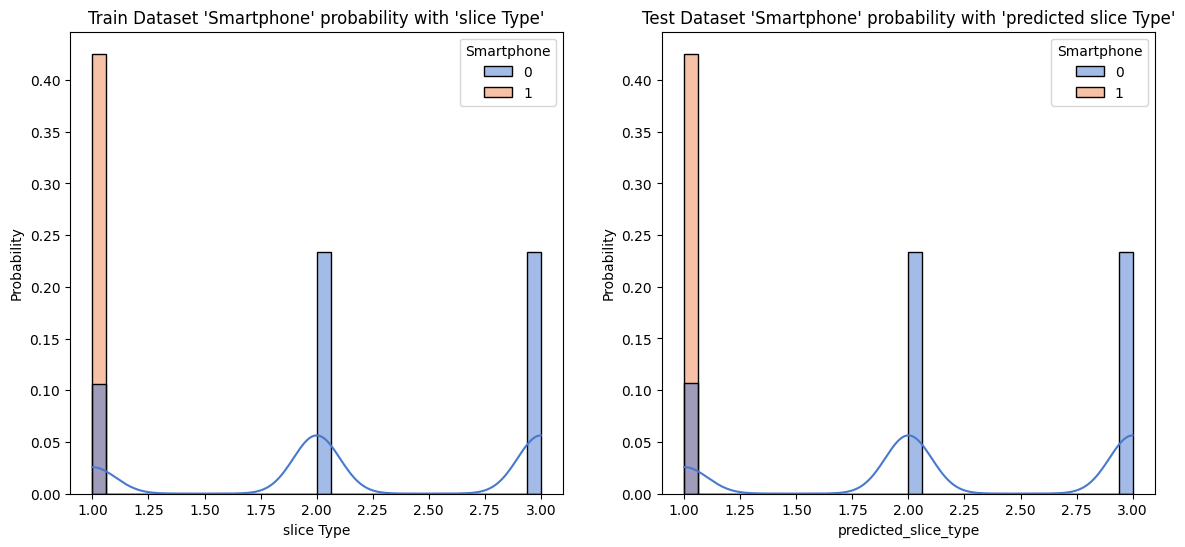

In [ ]:
#Smartphone
plt.figure(figsize = (14,6))
#For train dataset
plt.subplot(1,2,1)
plt.title("Train Dataset 'Smartphone' probability with 'slice Type'")
ax1 = sns.histplot(data = train_dataset,x = "slice Type",hue = "Smartphone",
             palette = "muted",stat = "probability",alpha = 0.5,kde = True)
#For test dataset
plt.subplot(1,2,2)
plt.title("Test Dataset 'Smartphone' probability with 'predicted slice Type'")
ax2 = sns.histplot(data = test_dataset,x = "predicted_slice_type",hue = "Smartphone",
             palette = "muted",stat = "probability",alpha = 0.5,kde = True)

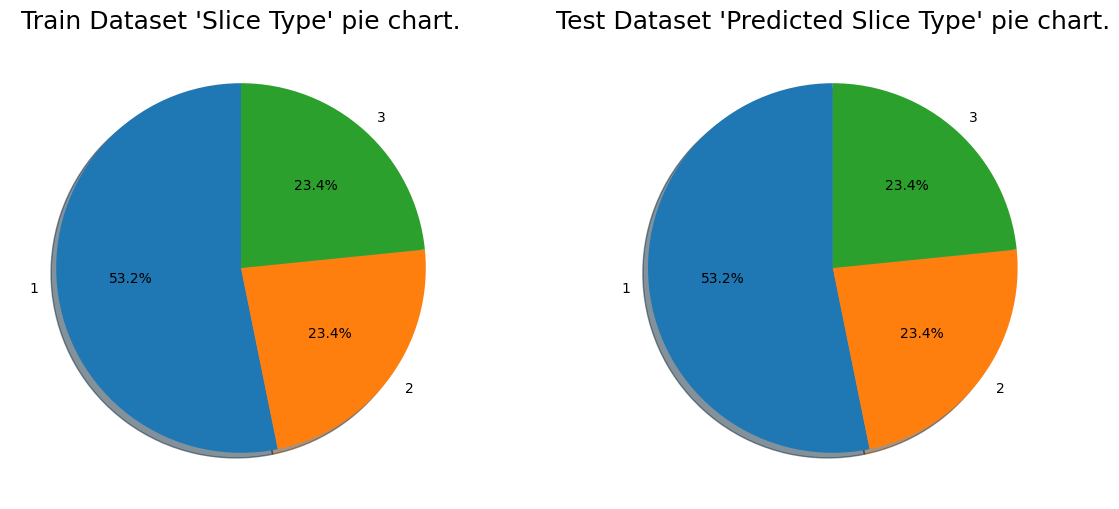

In [ ]:
#Slice types pie chart.
fig = plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
#For train dataset 'slice Type'
plt.title("Train Dataset 'Slice Type' pie chart.",fontsize = "18")
plt.pie(train_dataset["slice Type"].value_counts().values, labels=["1","2","3"],autopct='%1.1f%%', 
        shadow=True, startangle=90);

plt.subplot(1,2,2)
#For test dataset 'predicted slice type'
plt.title("Test Dataset 'Predicted Slice Type' pie chart.",fontsize = "18")
plt.pie(test_dataset["predicted_slice_type"].value_counts().values, labels=["1","2","3"] ,
        autopct='%1.1f%%', shadow=True, startangle=90);

In [ ]:
print(train_dataset["slice Type"].value_counts().values)
print(test_dataset["predicted_slice_type"].value_counts().values)

[16799  7392  7392]
[16800  7392  7392]
